Checking for NaN in filtered data:
Bilirubin      0
Albumin        0
SGOT           0
Prothrombin    0
Stage          0
dtype: int64
Descriptive Statistical Analysis for Real Data:

Summary Statistics:
         Bilirubin     Albumin        SGOT  Prothrombin       Stage  \
count  412.000000  412.000000  412.000000   412.000000  412.000000   
mean     3.227670    3.500073  120.649466    10.732767    3.024272   
std      4.429421    0.423948   49.436930     1.024098    0.882042   
min      0.300000    1.960000   26.350000     9.000000    1.000000   
25%      0.800000    3.247500   90.725000    10.000000    2.000000   
50%      1.400000    3.530000  114.700000    10.600000    3.000000   
75%      3.400000    3.782500  136.485000    11.100000    4.000000   
max     28.000000    4.640000  457.250000    18.000000    4.000000   

       Bilirubin_log    SGOT_log  
count     412.000000  412.000000  
mean        1.125878    4.727239  
std         0.709505    0.386204  
min         0.262364    3.

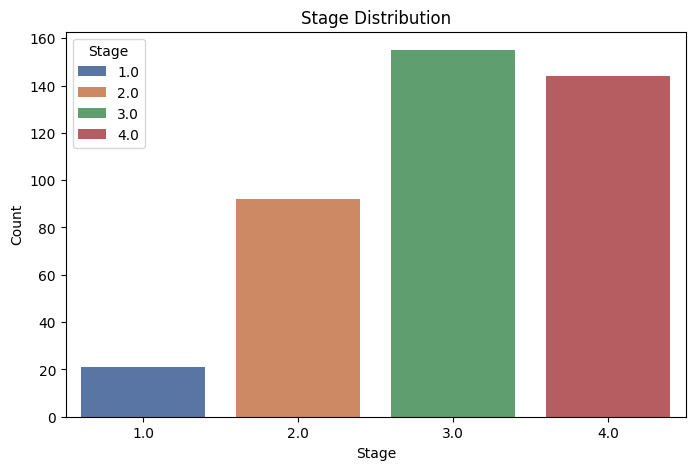

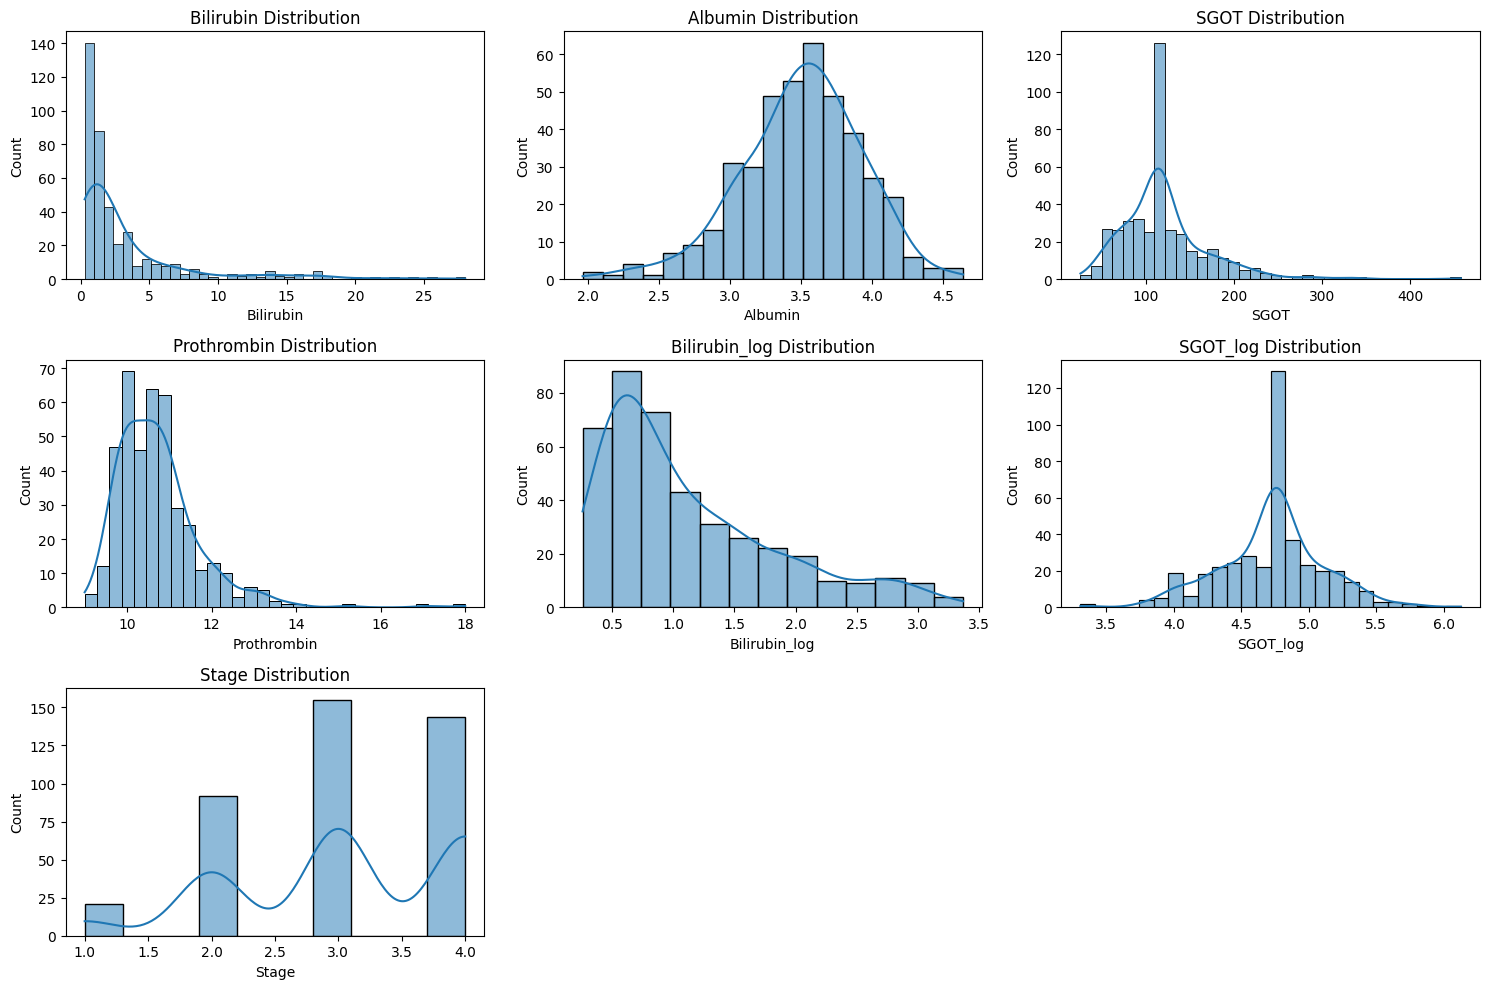

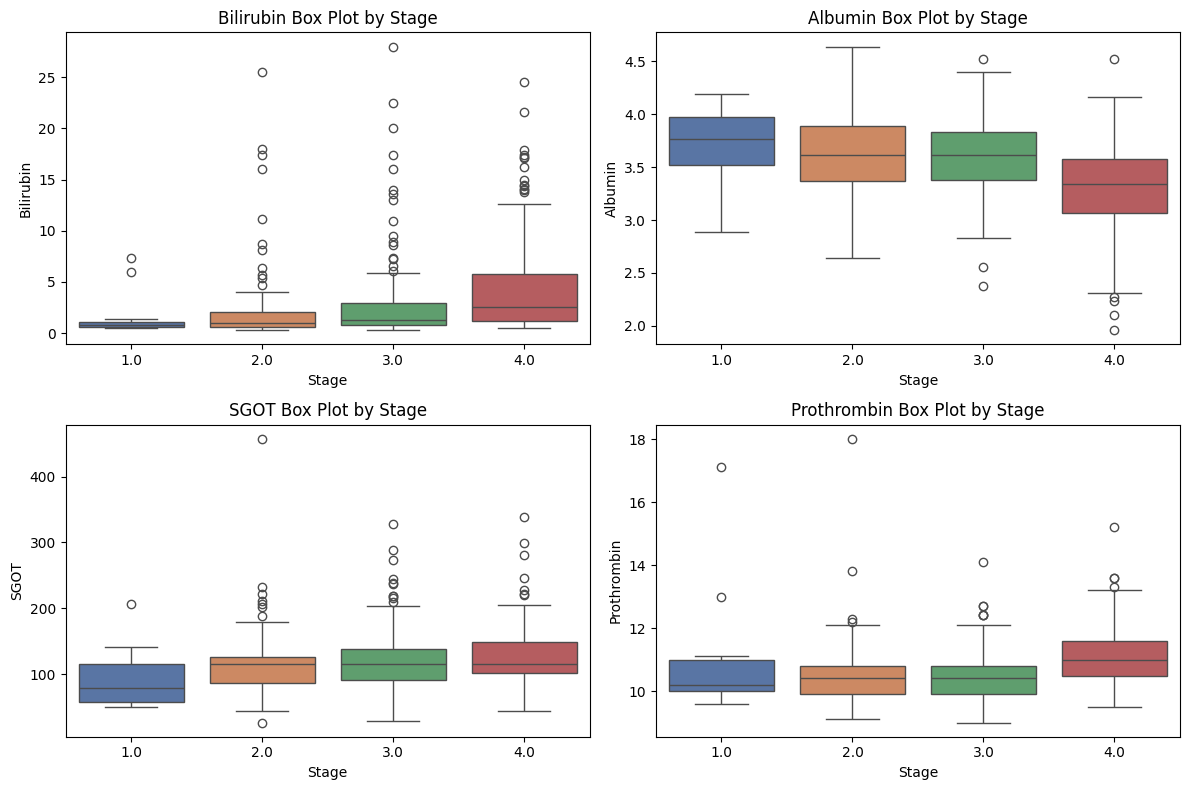

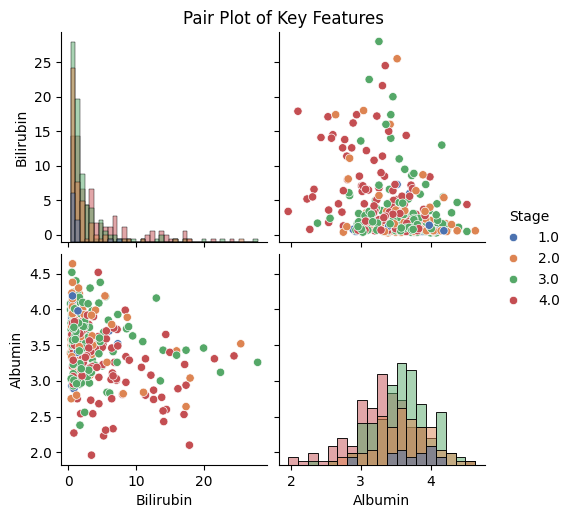

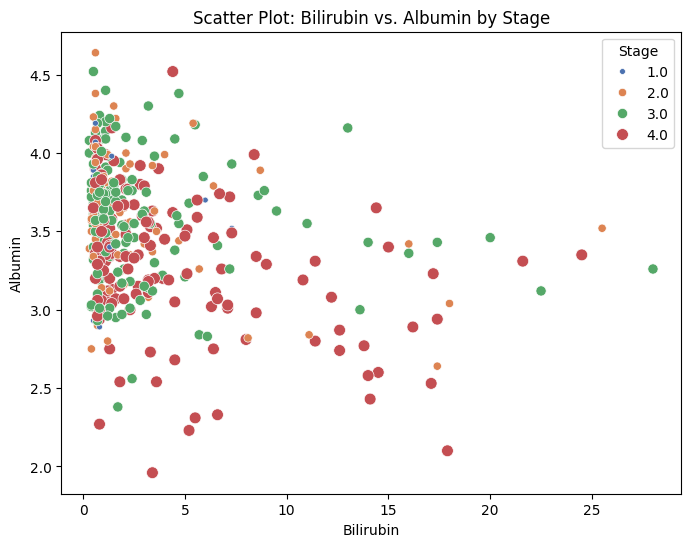

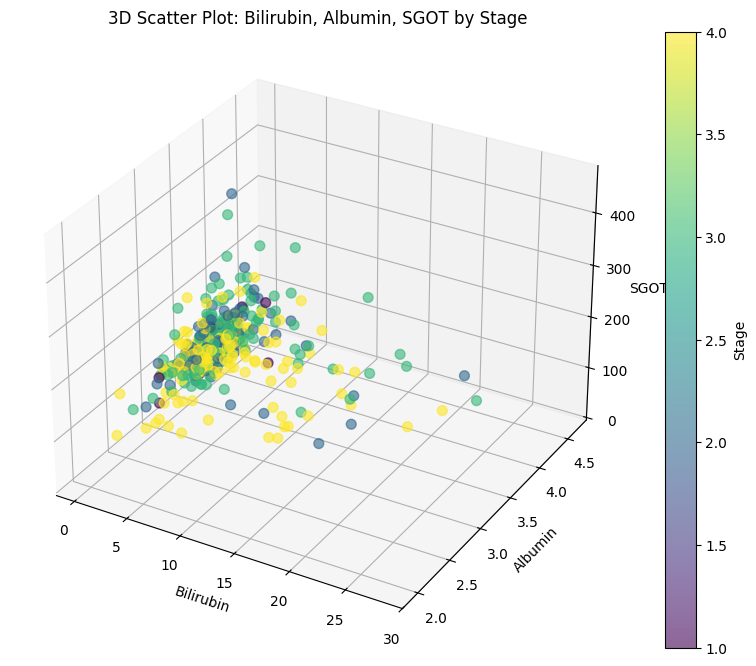

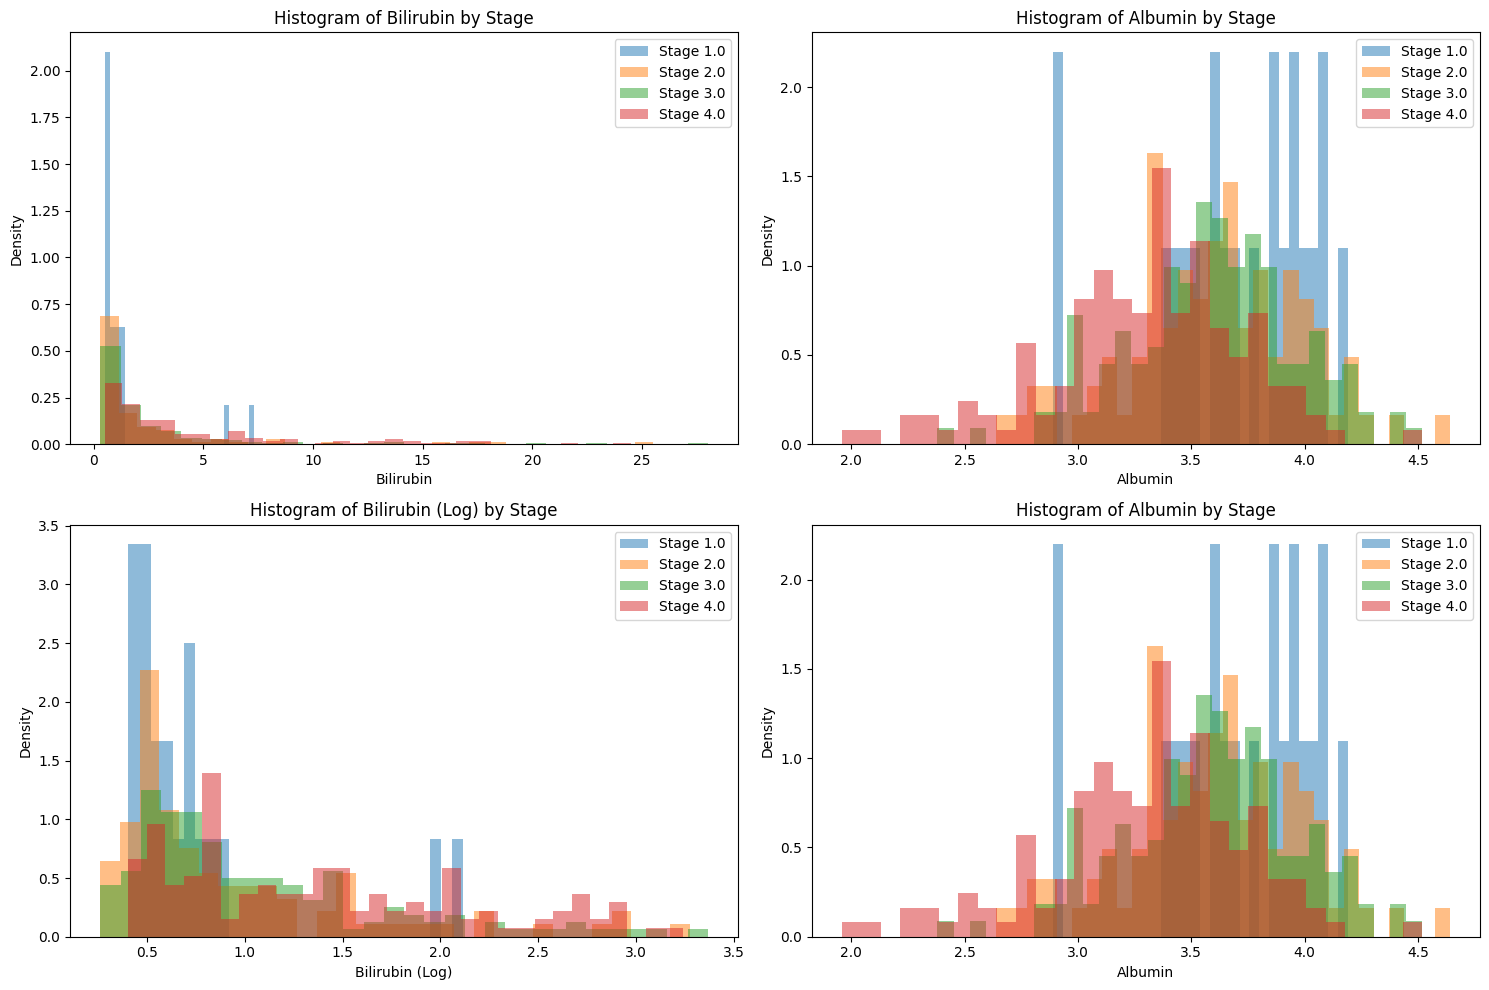


ANOVA Test Results (Feature Differences Across Stages):
Bilirubin: F-statistic = 6.3640, p-value = 0.0003
Reject H0: Bilirubin differs significantly across Stages.
Albumin: F-statistic = 18.5898, p-value = 0.0000
Reject H0: Albumin differs significantly across Stages.
SGOT: F-statistic = 3.5857, p-value = 0.0139
Reject H0: SGOT differs significantly across Stages.
Prothrombin: F-statistic = 13.5696, p-value = 0.0000
Reject H0: Prothrombin differs significantly across Stages.


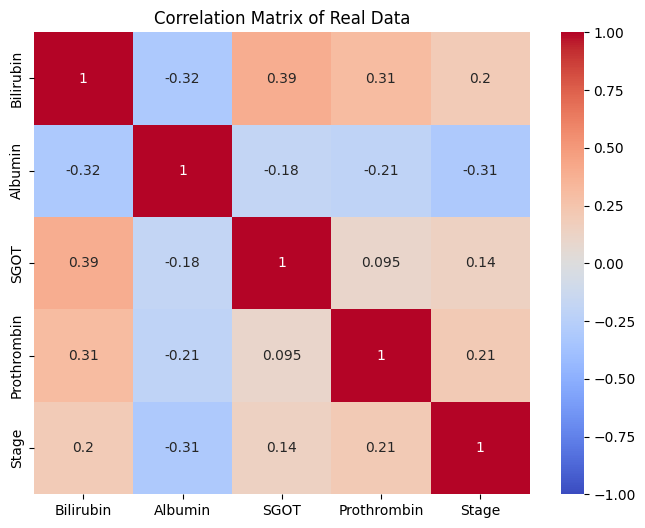


Correlation Significance (p-values):
Bilirubin vs SGOT: Correlation = 0.3929, p-value = 0.0000
Significant correlation between Bilirubin and SGOT.
Bilirubin vs Prothrombin: Correlation = 0.3103, p-value = 0.0000
Significant correlation between Bilirubin and Prothrombin.
Albumin vs Bilirubin: Correlation = -0.3186, p-value = 0.0000
Significant correlation between Albumin and Bilirubin.
Albumin vs SGOT: Correlation = -0.1835, p-value = 0.0002
Significant correlation between Albumin and SGOT.
Albumin vs Prothrombin: Correlation = -0.2056, p-value = 0.0000
Significant correlation between Albumin and Prothrombin.
Prothrombin vs SGOT: Correlation = 0.0946, p-value = 0.0549
No significant correlation between Prothrombin and SGOT.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('cirrhosis.csv')

# Preprocessing
# Handle missing values (fill with median for numerical columns)
numerical_cols = ['Bilirubin', 'Albumin', 'SGOT', 'Prothrombin']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop rows with remaining missing values and select relevant columns
df_filtered = df[numerical_cols + ['Stage']].dropna()

# Check for remaining NaNs
print("Checking for NaN in filtered data:")
print(df_filtered.isna().sum())

# Handle outliers with log transformation for skewed features
for col in ['Bilirubin', 'SGOT']:
    df_filtered[f'{col}_log'] = np.log1p(df_filtered[col])

# Enhanced Descriptive Statistical Analysis
print("Descriptive Statistical Analysis for Real Data:")
# Summary statistics (mean, std, quartiles, etc.)
summary_stats = df_filtered.describe()
print("\nSummary Statistics:\n", summary_stats)

# Skewness and kurtosis
skewness = df_filtered.skew()
kurtosis = df_filtered.kurtosis()
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

# Stage distribution to check for imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x='Stage', data=df_filtered, hue='Stage', palette='deep')
plt.title('Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.savefig('stage_distribution.png')
plt.show()

# Visualizations
# Histograms for each feature (original and log-transformed for skewed features)
plt.figure(figsize=(15, 10))
cols_to_plot = numerical_cols + ['Bilirubin_log', 'SGOT_log', 'Stage']
for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

# Box plots for each feature, stratified by Stage
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):  # Exclude 'Stage' for box plots
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Stage', y=col, data=df_filtered, hue='Stage', palette='deep', legend=False)
    plt.title(f'{col} Box Plot by Stage')
plt.tight_layout()
plt.savefig('box_plots.png')
plt.show()

# Pair plot (focus on key features for clarity)
key_features = ['Bilirubin', 'Albumin', 'Stage']
sns.pairplot(df_filtered[key_features], hue='Stage', diag_kind='hist', palette='deep')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.savefig('pair_plot.png')
plt.show()

# Separate scatter plot for Bilirubin vs. Albumin
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bilirubin', y='Albumin', hue='Stage', size='Stage', data=df_filtered, palette='deep')
plt.title('Scatter Plot: Bilirubin vs. Albumin by Stage')
plt.savefig('scatter_bilirubin_albumin.png')
plt.show()

# 3D scatter plot using Bilirubin, Albumin, and SGOT
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_filtered['Bilirubin'],
    df_filtered['Albumin'],
    df_filtered['SGOT'],
    c=df_filtered['Stage'],
    cmap='viridis',
    s=50,
    alpha=0.6
)
ax.set_xlabel('Bilirubin')
ax.set_ylabel('Albumin')
ax.set_zlabel('SGOT')
ax.set_title('3D Scatter Plot: Bilirubin, Albumin, SGOT by Stage')
plt.colorbar(scatter, label='Stage')
plt.savefig('3d_scatter.png')
plt.show()

# Histograms for Bilirubin and Albumin, Stratified by Stage (original and log-transformed)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for stage in sorted(df_filtered['Stage'].unique()):
    subset = df_filtered[df_filtered['Stage'] == stage]
    axes[0, 0].hist(subset['Bilirubin'], bins=30, alpha=0.5, label=f'Stage {stage}', density=True)
    axes[0, 1].hist(subset['Albumin'], bins=30, alpha=0.5, label=f'Stage {stage}', density=True)
    axes[1, 0].hist(subset['Bilirubin_log'], bins=30, alpha=0.5, label=f'Stage {stage}', density=True)
    axes[1, 1].hist(subset['Albumin'], bins=30, alpha=0.5, label=f'Stage {stage}', density=True)
axes[0, 0].set_title('Histogram of Bilirubin by Stage')
axes[0, 0].set_xlabel('Bilirubin')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 1].set_title('Histogram of Albumin by Stage')
axes[0, 1].set_xlabel('Albumin')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[1, 0].set_title('Histogram of Bilirubin (Log) by Stage')
axes[1, 0].set_xlabel('Bilirubin (Log)')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()
axes[1, 1].set_title('Histogram of Albumin by Stage')
axes[1, 1].set_xlabel('Albumin')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
plt.tight_layout()
plt.savefig('stratified_histograms.png')
plt.show()

# Statistical tests: ANOVA to compare features across stages
print("\nANOVA Test Results (Feature Differences Across Stages):")
for col in numerical_cols:
    groups = [df_filtered[df_filtered['Stage'] == stage][col] for stage in sorted(df_filtered['Stage'].unique())]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{col}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"Reject H0: {col} differs significantly across Stages.")
    else:
        print(f"Fail to reject H0: {col} does not differ significantly across Stages.")

# Correlation matrix with significance
plt.figure(figsize=(8, 6))
corr_matrix = df_filtered[numerical_cols + ['Stage']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Real Data')
plt.savefig('correlation_matrix.png')
plt.show()

# Test significance of correlations
print("\nCorrelation Significance (p-values):")
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 < col2:  # Avoid duplicates
            corr, p_value = stats.pearsonr(df_filtered[col1], df_filtered[col2])
            print(f"{col1} vs {col2}: Correlation = {corr:.4f}, p-value = {p_value:.4f}")
            if p_value < 0.05:
                print(f"Significant correlation between {col1} and {col2}.")
            else:
                print(f"No significant correlation between {col1} and {col2}.")

# Save the preprocessed data for later use
df_filtered.to_csv('preprocessed_cirrhosis2.csv', index=False)

Checking for NaN in original data:
Bilirubin        0
Albumin          0
SGOT             0
Prothrombin      0
Stage            0
Bilirubin_log    0
SGOT_log         0
dtype: int64
Stage 1: 21 samples
Stage 2: 92 samples
Stage 3: 155 samples
Stage 4: 144 samples
Training GAN for Stage 1...
Stage 1, Epoch 5, KS-test P-values per feature: {'Bilirubin': np.float64(0.00043856370934767223), 'Albumin': np.float64(0.36497950870925666), 'SGOT': np.float64(1.5605902670238322e-10), 'Prothrombin': np.float64(0.36497950870925666)}
Stage 1, Epoch 5, Mean KS-test P-value: 0.1826
Stage 1, Epoch 10, KS-test P-values per feature: {'Bilirubin': np.float64(0.00043856370934767223), 'Albumin': np.float64(0.8530789718547532), 'SGOT': np.float64(1.5605902670238322e-10), 'Prothrombin': np.float64(0.1963120402389556)}
Stage 1, Epoch 10, Mean KS-test P-value: 0.2625
Stage 1, Epoch 15, KS-test P-values per feature: {'Bilirubin': np.float64(1.94917204154521e-05), 'Albumin': np.float64(0.09481656218610322), 'SGOT'

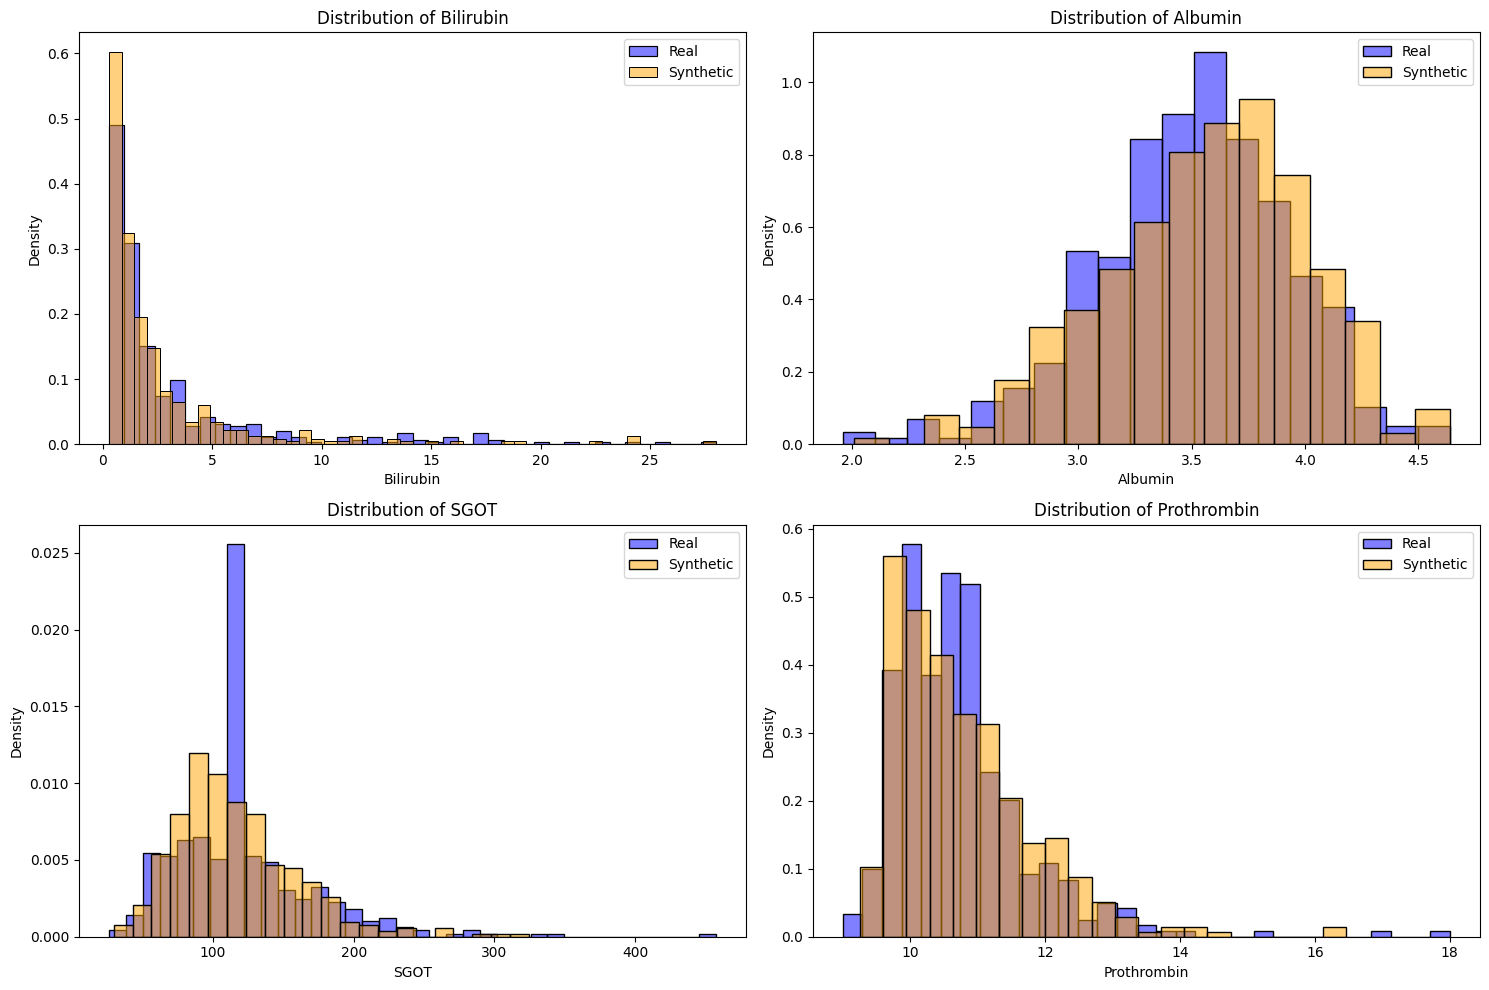

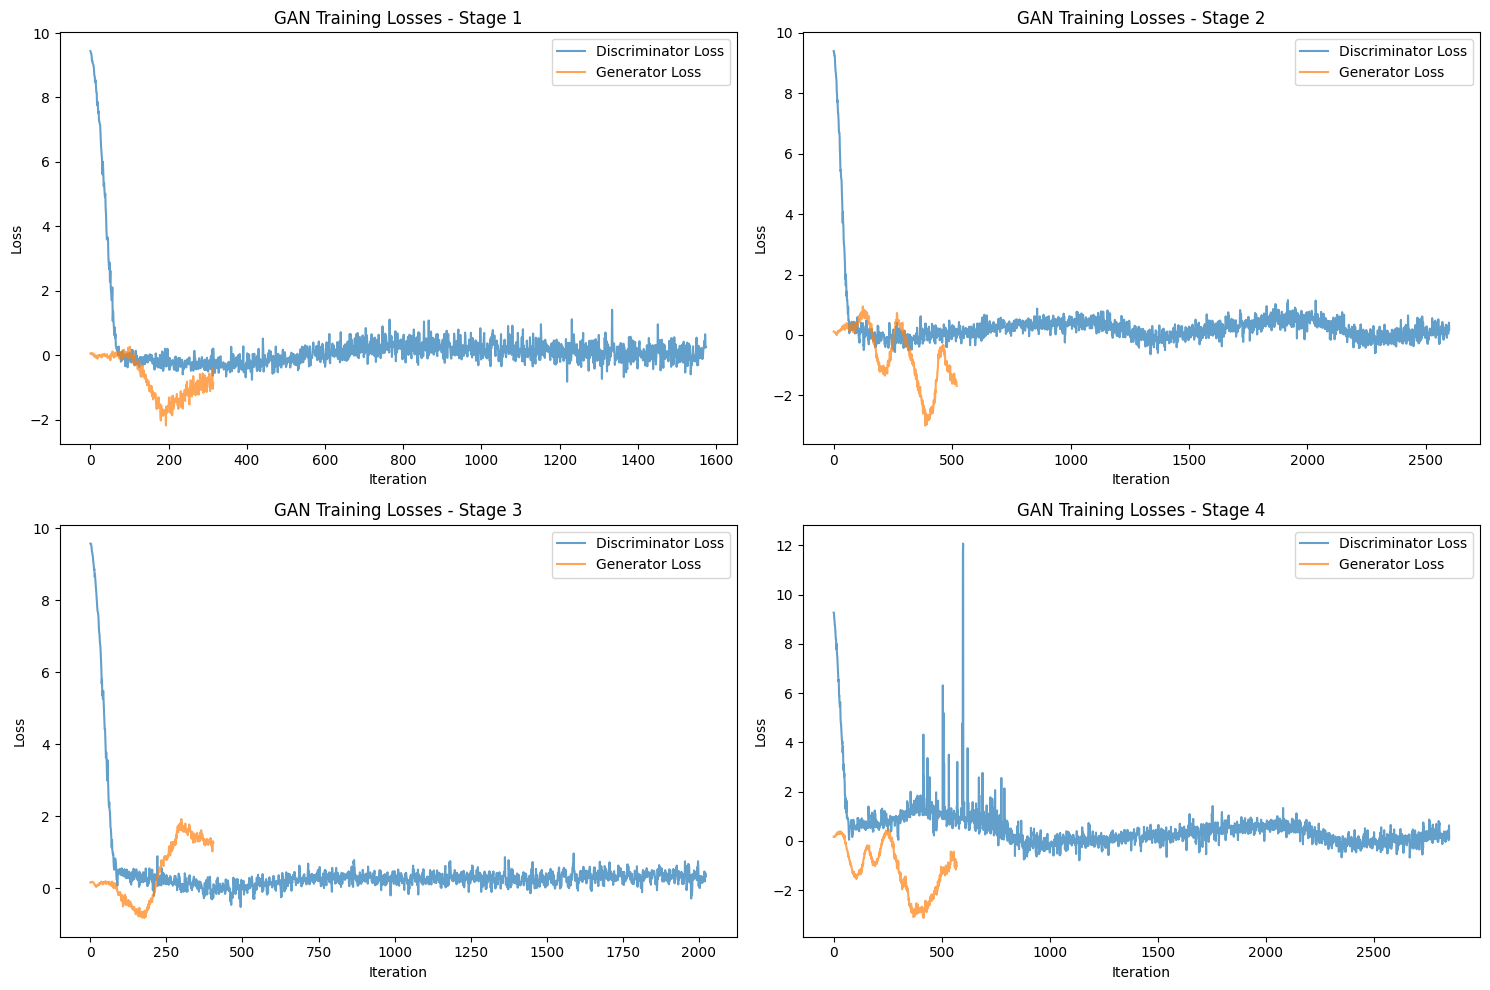

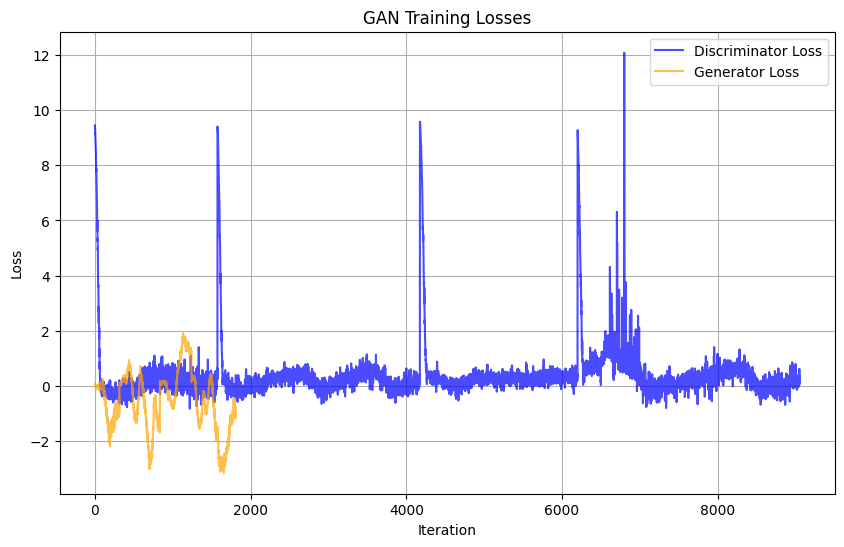

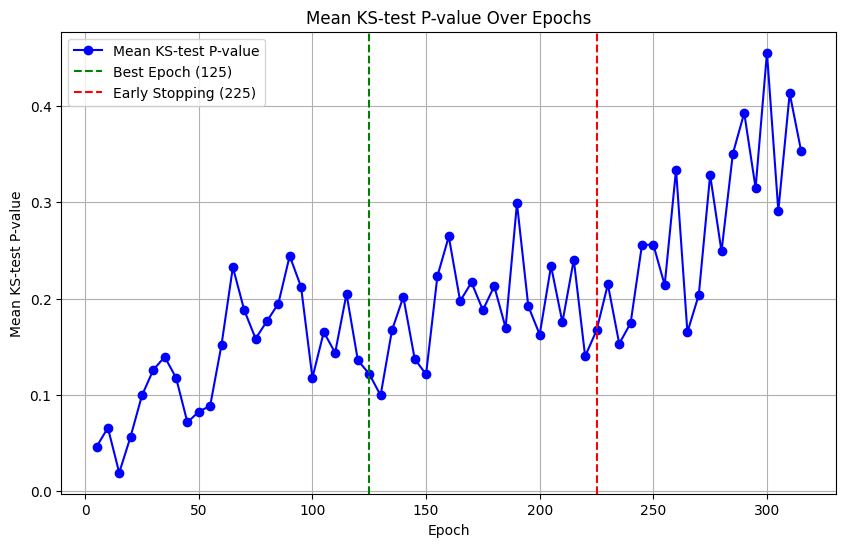

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Load the preprocessed data
df_filtered = pd.read_csv('preprocessed_cirrhosis2.csv')

# Check for NaN in original data
print("Checking for NaN in original data:")
print(df_filtered.isna().sum())
df_filtered.fillna(df_filtered.median(numeric_only=True), inplace=True)

# Segment data by Stage
stage_1 = df_filtered[df_filtered['Stage'] == 1]
stage_2 = df_filtered[df_filtered['Stage'] == 2]
stage_3 = df_filtered[df_filtered['Stage'] == 3]
stage_4 = df_filtered[df_filtered['Stage'] == 4]

# Check the size of each subset
print(f"Stage 1: {len(stage_1)} samples")
print(f"Stage 2: {len(stage_2)} samples")
print(f"Stage 3: {len(stage_3)} samples")
print(f"Stage 4: {len(stage_4)} samples")

# Features for GAN
features_for_gan = ['Bilirubin', 'Albumin', 'SGOT', 'Prothrombin']
latent_dim = 100
num_stages = 4  # For conditional GAN
output_dim = len(features_for_gan)
num_epochs = 500  # Increased for better training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Conditional Generator and Discriminator for WGAN-GP
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, num_stages, output_dim):
        super(ConditionalGenerator, self).__init__()
        self.label_emb = nn.Linear(num_stages, 16)  # Embedding for stage
        self.layer1 = nn.Linear(latent_dim + 16, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.layer2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.layer3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.layer4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.dropout = nn.Dropout(0.3)
        self.output = nn.Linear(64, output_dim)

    def forward(self, z, labels):
        c = self.label_emb(labels)
        x = torch.cat([z, c], dim=1)
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer3(x)
        x = self.bn3(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer4(x)
        x = self.bn4(x)
        x = self.leaky_relu(x)
        x = self.output(x)
        return x

class ConditionalDiscriminator(nn.Module):
    def __init__(self, input_dim, num_stages):
        super(ConditionalDiscriminator, self).__init__()
        self.label_emb = nn.Linear(num_stages, 16)
        self.layer1 = nn.Linear(input_dim + 16, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, labels):
        c = self.label_emb(labels)
        x = torch.cat([x, c], dim=1)
        x = self.layer1(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer3(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer4(x)
        return x

# Gradient penalty for WGAN-GP
def compute_gradient_penalty(D, real_samples, fake_samples, labels, device):
    alpha = torch.rand(real_samples.size(0), 1).to(device)
    alpha = alpha.expand(real_samples.size())
    interpolates = (alpha * real_samples + (1 - alpha) * fake_samples).requires_grad_(True)
    d_interpolates = D(interpolates, labels)
    fake = torch.ones(real_samples.size(0), 1).to(device)
    gradients = torch.autograd.grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=fake,
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

# Correlation loss to encourage matching feature correlations
def correlation_loss(real_data, fake_data):
    real_corr = torch.corrcoef(real_data)
    fake_corr = torch.corrcoef(fake_data)
    return torch.mean((real_corr - fake_corr) ** 2)

# Modified train_gan with WGAN-GP and conditional generation
def train_gan(data, stage_label, latent_dim, num_stages, output_dim, num_epochs, device):
    data_df = pd.DataFrame(data, columns=features_for_gan)
    # Apply log transformation to heavy-tailed features
    data_df['Bilirubin'] = np.log1p(data_df['Bilirubin'])
    data_df['SGOT'] = np.log1p(data_df['SGOT'])

    scaler = RobustScaler()  # Use RobustScaler to handle outliers
    data_scaled = scaler.fit_transform(data_df)
    data_tensor = torch.FloatTensor(data_scaled).to(device)
    labels = torch.zeros(len(data), num_stages).to(device)
    labels[:, stage_label - 1] = 1  # One-hot encoding for stage
    dataset = TensorDataset(data_tensor, labels)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    generator = ConditionalGenerator(latent_dim, num_stages, output_dim).to(device)
    discriminator = ConditionalDiscriminator(output_dim, num_stages).to(device)

    d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.9))
    g_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.9))

    d_losses, g_losses, ks_pvalues = [], [], []
    best_ks_pvalue = 0.0
    best_epoch = 0
    early_stopping_epoch = num_epochs
    epochs_since_improvement = 0
    patience = 100
    lambda_gp = 10
    n_critic = 5
    lambda_corr = 0.1  # Weight for correlation loss

    for epoch in range(num_epochs):
        for real_data, batch_labels in dataloader:
            real_data, batch_labels = real_data.to(device), batch_labels.to(device)
            batch_size = real_data.size(0)

            # Train Discriminator
            for _ in range(n_critic):
                z = torch.randn(batch_size, latent_dim).to(device)
                fake_data = generator(z, batch_labels)
                d_real = discriminator(real_data, batch_labels)
                d_fake = discriminator(fake_data, batch_labels)
                gradient_penalty = compute_gradient_penalty(discriminator, real_data, fake_data, batch_labels, device)
                d_loss = -torch.mean(d_real) + torch.mean(d_fake) + lambda_gp * gradient_penalty
                d_optimizer.zero_grad()
                d_loss.backward()
                torch.nn.utils.clip_grad_norm_(discriminator.parameters(), max_norm=1.0)
                d_optimizer.step()
                d_losses.append(d_loss.item())

            # Train Generator
            z = torch.randn(batch_size, latent_dim).to(device)
            fake_data = generator(z, batch_labels)
            d_fake = discriminator(fake_data, batch_labels)
            corr_loss = correlation_loss(real_data, fake_data)
            g_loss = -torch.mean(d_fake) + lambda_corr * corr_loss
            g_optimizer.zero_grad()
            g_loss.backward()
            torch.nn.utils.clip_grad_norm_(generator.parameters(), max_norm=1.0)
            g_optimizer.step()
            g_losses.append(g_loss.item())

        if (epoch + 1) % 5 == 0:
            with torch.no_grad():
                z = torch.randn(len(data), latent_dim).to(device)
                labels = torch.zeros(len(data), num_stages).to(device)
                labels[:, stage_label - 1] = 1
                synthetic_data = generator(z, labels)
                synthetic_data = synthetic_data.cpu().numpy()
                synthetic_data = scaler.inverse_transform(synthetic_data)
                # Reverse log transformation for Bilirubin and SGOT
                synthetic_data[:, 0] = np.expm1(synthetic_data[:, 0])  # Bilirubin
                synthetic_data[:, 2] = np.expm1(synthetic_data[:, 2])  # SGOT
                # Apply physical constraints
                synthetic_data[:, 0] = np.clip(synthetic_data[:, 0], data_df['Bilirubin'].min(), data_df['Bilirubin'].max())
                synthetic_data[:, 1] = np.clip(synthetic_data[:, 1], data_df['Albumin'].min(), data_df['Albumin'].max())
                synthetic_data[:, 2] = np.clip(synthetic_data[:, 2], data_df['SGOT'].min(), data_df['SGOT'].max())
                synthetic_data[:, 3] = np.clip(synthetic_data[:, 3], data_df['Prothrombin'].min(), data_df['Prothrombin'].max())
                synthetic_df = pd.DataFrame(synthetic_data, columns=features_for_gan)

                p_values = []
                for col in features_for_gan:
                    _, p_value = ks_2samp(data_df[col], synthetic_df[col])
                    p_values.append(p_value)
                p_values_dict = dict(zip(features_for_gan, p_values))
                print(f"Stage {stage_label}, Epoch {epoch + 1}, KS-test P-values per feature: {p_values_dict}")
                mean_p_value = np.mean(p_values)
                ks_pvalues.append(mean_p_value)
                print(f"Stage {stage_label}, Epoch {epoch + 1}, Mean KS-test P-value: {mean_p_value:.4f}")

                if mean_p_value > best_ks_pvalue:
                    best_ks_pvalue = mean_p_value
                    best_epoch = epoch + 1
                    epochs_since_improvement = 0
                else:
                    epochs_since_improvement += 5
                    if epochs_since_improvement >= patience:
                        early_stopping_epoch = epoch + 1
                        break

    print(f"Stage {stage_label} Best KS-test P-value: {best_ks_pvalue:.4f} at Epoch {best_epoch}")
    torch.save(generator.state_dict(), f'generator_stage_{stage_label}.pth')
    return d_losses, g_losses, scaler, ks_pvalues, best_epoch, early_stopping_epoch, generator

# Train GAN for each Stage and generate synthetic data
stages = [stage_1, stage_2, stage_3, stage_4]
stage_labels = [1, 2, 3, 4]
all_d_losses, all_g_losses, all_ks_pvalues = [], [], []
best_epochs, early_stopping_epochs = [], []
synthetic_datasets = []
num_samples_per_stage = 100

for stage_data, label in zip(stages, stage_labels):
    print(f"Training GAN for Stage {label}...")
    stage_data_subset = stage_data[features_for_gan].values
    d_losses, g_losses, scaler, ks_pvalues, best_epoch, early_stopping_epoch, generator = train_gan(
        stage_data_subset, label, latent_dim, num_stages, output_dim, num_epochs, device
    )
    all_d_losses.append(d_losses)
    all_g_losses.append(g_losses)
    all_ks_pvalues.append(ks_pvalues)
    best_epochs.append(best_epoch)
    early_stopping_epochs.append(early_stopping_epoch)

    # Generate synthetic data with constraints
    with torch.no_grad():
        z = torch.randn(num_samples_per_stage, latent_dim).to(device)
        labels = torch.zeros(num_samples_per_stage, num_stages).to(device)
        labels[:, label - 1] = 1
        synthetic_data = generator(z, labels)
        synthetic_data = synthetic_data.cpu().numpy()
        if np.any(np.isnan(synthetic_data)) or np.any(np.isinf(synthetic_data)):
            print(f"Warning: NaN or infinite values detected in scaled synthetic data for Stage {label}")
            synthetic_data = np.nan_to_num(synthetic_data, nan=0.0, posinf=0.0, neginf=0.0)
        synthetic_data = scaler.inverse_transform(synthetic_data)
        # Reverse log transformation for Bilirubin and SGOT
        synthetic_data[:, 0] = np.expm1(synthetic_data[:, 0])  # Bilirubin
        synthetic_data[:, 2] = np.expm1(synthetic_data[:, 2])  # SGOT
        # Apply physical constraints
        synthetic_data[:, 0] = np.clip(synthetic_data[:, 0], stage_data['Bilirubin'].min(), stage_data['Bilirubin'].max())
        synthetic_data[:, 1] = np.clip(synthetic_data[:, 1], stage_data['Albumin'].min(), stage_data['Albumin'].max())
        synthetic_data[:, 2] = np.clip(synthetic_data[:, 2], stage_data['SGOT'].min(), stage_data['SGOT'].max())
        synthetic_data[:, 3] = np.clip(synthetic_data[:, 3], stage_data['Prothrombin'].min(), stage_data['Prothrombin'].max())
        synthetic_df = pd.DataFrame(synthetic_data, columns=features_for_gan)
        for col in features_for_gan:
            if synthetic_df[col].isna().any():
                median_val = stage_data[col].median()
                synthetic_df[col].fillna(median_val, inplace=True)
        synthetic_df['Stage'] = label
        synthetic_datasets.append(synthetic_df)

# Combine synthetic datasets
combined_synthetic_df = pd.concat(synthetic_datasets, ignore_index=True)

# Save the synthetic data to a CSV file
combined_synthetic_df.to_csv('synthetic_cirrhosis_data2.csv', index=False)
print("Synthetic data saved to 'synthetic_cirrhosis_data2.csv'")

# Visualize feature distributions for real vs. synthetic data
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_gan, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_filtered[feature], color='blue', label='Real', alpha=0.5, stat='density')
    sns.histplot(combined_synthetic_df[feature], color='orange', label='Synthetic', alpha=0.5, stat='density')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.savefig('feature_distributions.png')

# Evaluate synthetic data
print("Synthetic Data Summary:")
print(combined_synthetic_df[features_for_gan].describe())
print("\nOriginal Data Summary (for comparison):")
print(df_filtered[features_for_gan].describe())

print("Synthetic Data Stage Distribution:")
print(combined_synthetic_df['Stage'].value_counts())

# Plot losses for each Stage
plt.figure(figsize=(15, 10))
for i, (d_losses, g_losses, label) in enumerate(zip(all_d_losses, all_g_losses, stage_labels)):
    plt.subplot(2, 2, i+1)
    plt.plot(d_losses, label='Discriminator Loss', alpha=0.7)
    plt.plot(g_losses, label='Generator Loss', alpha=0.7)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(f'GAN Training Losses - Stage {label}')
    plt.legend()
plt.tight_layout()
plt.savefig('gan_losses_stages.png')

# Combined GAN Loss Plot
combined_d_losses = []
combined_g_losses = []
for d_losses, g_losses in zip(all_d_losses, all_g_losses):
    combined_d_losses.extend(d_losses)
    combined_g_losses.extend(g_losses)

plt.figure(figsize=(10, 6))
plt.plot(combined_d_losses, label='Discriminator Loss', color='blue', alpha=0.7)
plt.plot(combined_g_losses, label='Generator Loss', color='orange', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('GAN Training Losses')
plt.legend()
plt.grid(True)
plt.savefig('gan_losses_combined.png')

# Print all KS-test P-values for each stage
print("\nKS-test P-values for each stage over epochs:")
for label, ks_pvalues in zip(stage_labels, all_ks_pvalues):
    epochs = range(5, (len(ks_pvalues) + 1) * 5, 5)
    print(f"Stage {label}:")
    for epoch, p_value in zip(epochs, ks_pvalues):
        print(f"  Epoch {epoch}: P-value = {p_value:.4f}")

# Plot Mean KS-test P-value Over Epochs
max_length = max(len(pvalues) for pvalues in all_ks_pvalues)
padded_ks_pvalues = np.array([pvalues + [np.nan] * (max_length - len(pvalues)) for pvalues in all_ks_pvalues])
mean_ks_pvalues = np.nanmean(padded_ks_pvalues, axis=0)
epochs = range(5, (len(mean_ks_pvalues) + 1) * 5, 5)

print("\nMean KS-test P-values across stages over epochs:")
for epoch, mean_p_value in zip(epochs, mean_ks_pvalues):
    print(f"Epoch {epoch}: Mean P-value = {mean_p_value:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(epochs, mean_ks_pvalues, marker='o', label='Mean KS-test P-value', color='blue')
plt.axvline(x=np.mean(best_epochs), color='green', linestyle='--', label=f'Best Epoch ({int(np.mean(best_epochs))})')
plt.axvline(x=np.mean(early_stopping_epochs), color='red', linestyle='--', label=f'Early Stopping ({int(np.mean(early_stopping_epochs))})')
plt.xlabel('Epoch')
plt.ylabel('Mean KS-test P-value')
plt.title('Mean KS-test P-value Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('ks_pvalue_plot.png')

# Enhanced Evaluation with Real, Synthetic, and Augmented Data
features = ['Bilirubin', 'Albumin', 'SGOT', 'Prothrombin']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1. Train on Real Data, Test on Real Data
X_real = df_filtered[features]
y_real = df_filtered['Stage']
X_real_scaled = scaler.fit_transform(X_real)
X_real_scaled = pd.DataFrame(X_real_scaled, columns=features)

real_accuracies = []
for train_idx, test_idx in skf.split(X_real_scaled, y_real):
    X_train, X_test = X_real_scaled.iloc[train_idx], X_real_scaled.iloc[test_idx]
    y_train, y_test = y_real.iloc[train_idx], y_real.iloc[test_idx]
    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    real_accuracies.append(accuracy_score(y_test, y_pred))
print(f"\nLogistic Regression (Train on Real, Test on Real):")
print(f"Accuracy: {np.mean(real_accuracies):.4f} ± {np.std(real_accuracies):.4f}")

# 2. Train on Synthetic Data, Test on Real Data
X_synthetic = combined_synthetic_df[features]
y_synthetic = combined_synthetic_df['Stage']
X_synthetic_scaled = scaler.fit_transform(X_synthetic)
X_synthetic_scaled = pd.DataFrame(X_synthetic_scaled, columns=features)

synthetic_accuracies = []
for train_idx, test_idx in skf.split(X_real_scaled, y_real):
    X_test = X_real_scaled.iloc[test_idx]
    y_test = y_real.iloc[test_idx]
    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_synthetic_scaled, y_synthetic)
    y_pred = model.predict(X_test)
    synthetic_accuracies.append(accuracy_score(y_test, y_pred))
print(f"\nLogistic Regression (Train on Synthetic, Test on Real):")
print(f"Accuracy: {np.mean(synthetic_accuracies):.4f} ± {np.std(synthetic_accuracies):.4f}")

# 3. Train on Augmented Data, Test on Real Data
augmented_data = pd.concat([df_filtered, combined_synthetic_df], ignore_index=True)
X_augmented = augmented_data[features]
y_augmented = augmented_data['Stage']
X_augmented_scaled = scaler.fit_transform(X_augmented)
X_augmented_scaled = pd.DataFrame(X_augmented_scaled, columns=features)

augmented_accuracies, f1_scores, auc_scores = [], [], []
for train_idx, test_idx in skf.split(X_real_scaled, y_real):
    X_test = X_real_scaled.iloc[test_idx]
    y_test = y_real.iloc[test_idx]
    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_augmented_scaled, y_augmented)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    augmented_accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))
print(f"\nLogistic Regression (Train on Augmented, Test on Real):")
print(f"Accuracy: {np.mean(augmented_accuracies):.4f} ± {np.std(augmented_accuracies):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"AUC-ROC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")

Checking for NaN in original data:
Bilirubin        0
Albumin          0
SGOT             0
Prothrombin      0
Stage            0
Bilirubin_log    0
SGOT_log         0
dtype: int64
Stage 1: 21 samples
Stage 2: 92 samples
Stage 3: 155 samples
Stage 4: 144 samples
Training GAN for Stage 1...
Stage 1, Epoch 5, KS-test P-values per feature: {'Bilirubin': np.float64(0.00043856370934767223), 'Albumin': np.float64(0.36497950870925666), 'SGOT': np.float64(1.5605902670238322e-10), 'Prothrombin': np.float64(0.36497950870925666)}
Stage 1, Epoch 5, Mean KS-test P-value: 0.1826
Stage 1, Epoch 10, KS-test P-values per feature: {'Bilirubin': np.float64(0.00043856370934767223), 'Albumin': np.float64(0.8530789718547532), 'SGOT': np.float64(1.5605902670238322e-10), 'Prothrombin': np.float64(0.1963120402389556)}
Stage 1, Epoch 10, Mean KS-test P-value: 0.2625
Stage 1, Epoch 15, KS-test P-values per feature: {'Bilirubin': np.float64(1.94917204154521e-05), 'Albumin': np.float64(0.09481656218610322), 'SGOT'

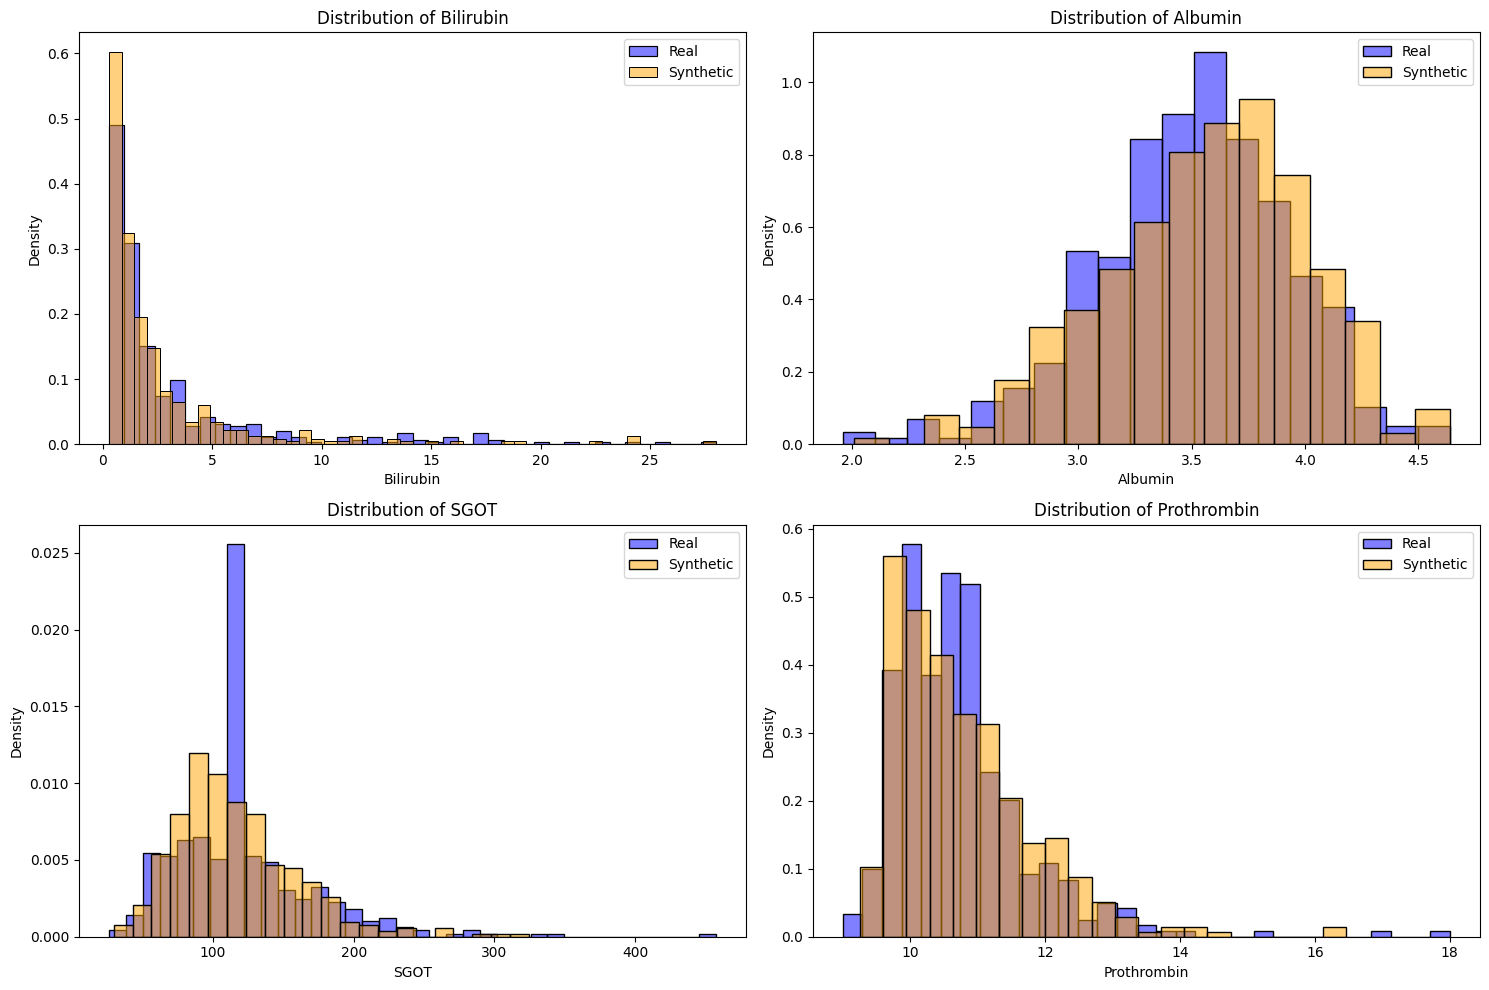

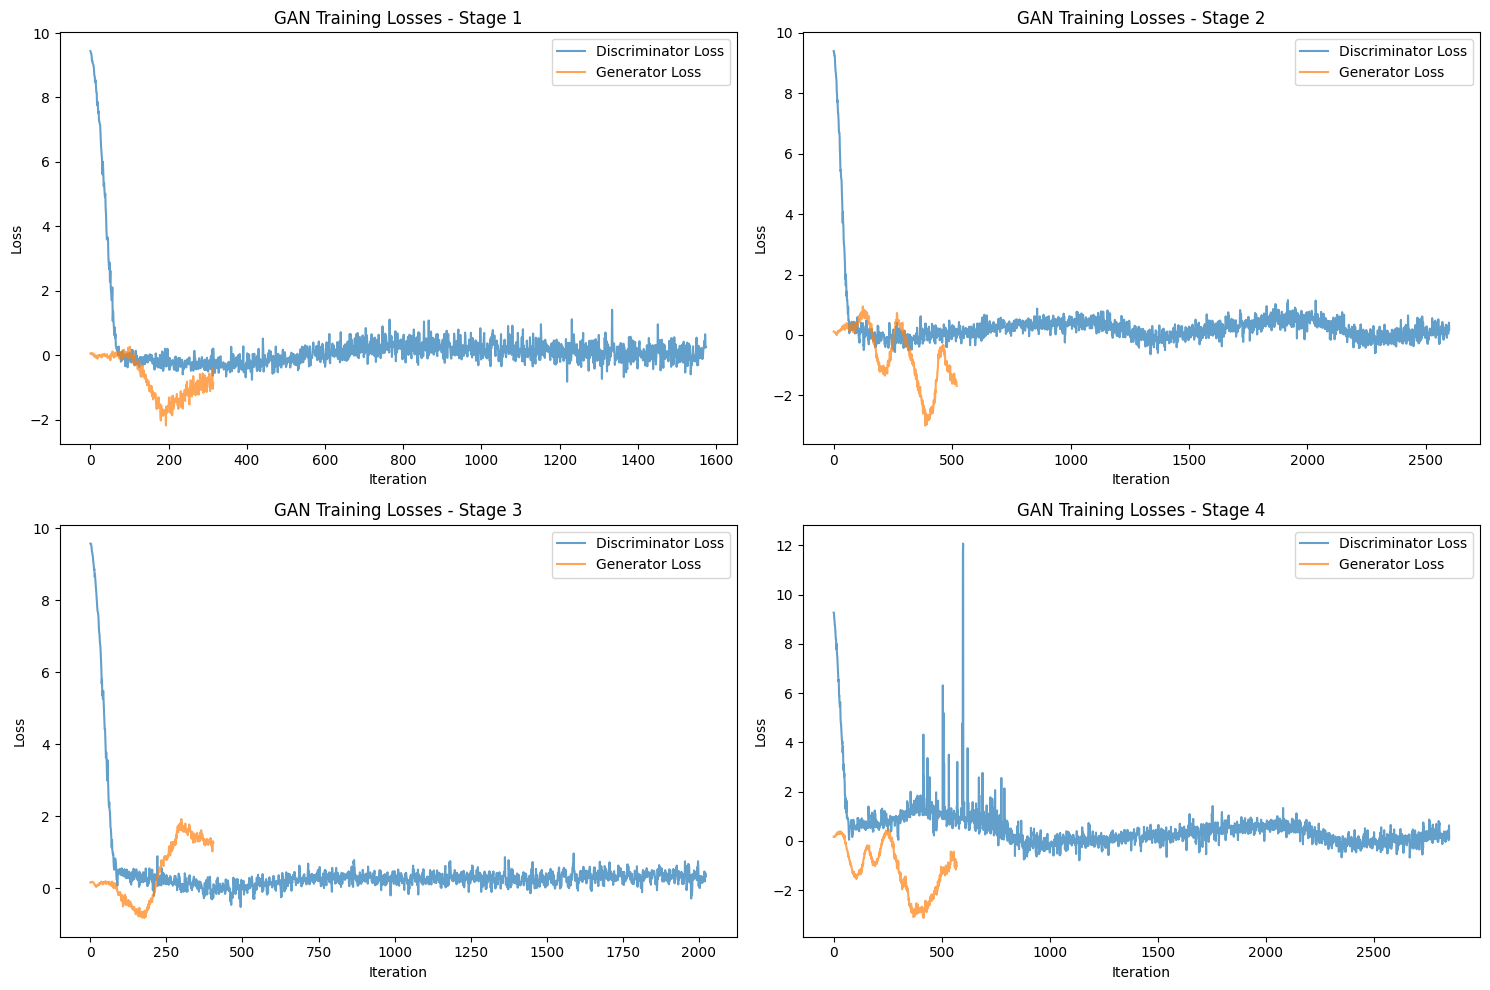

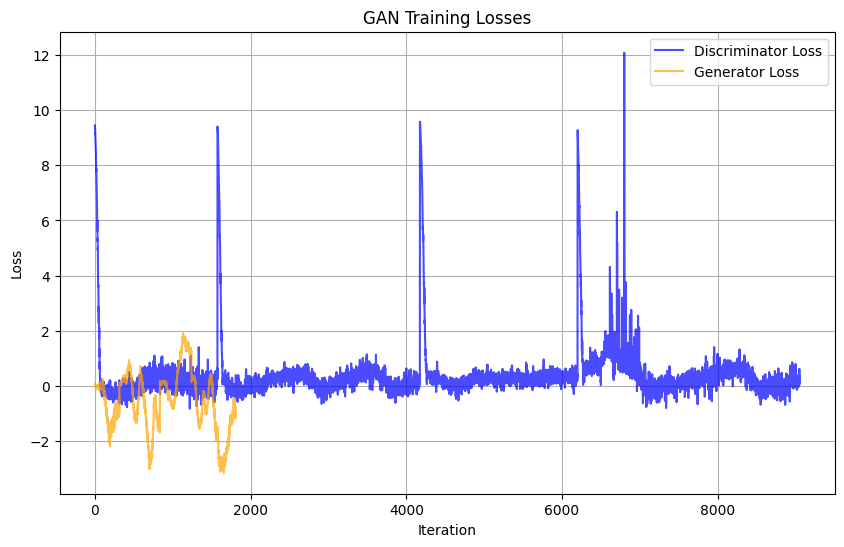

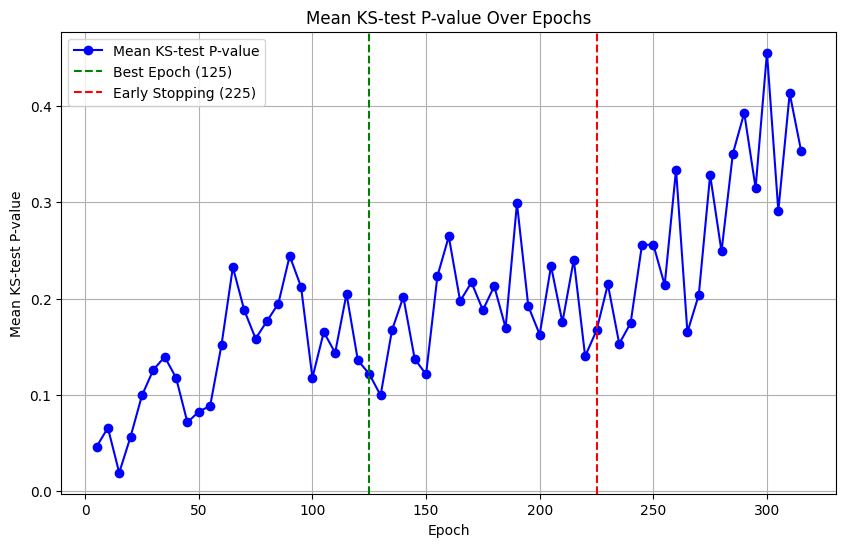

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Load the preprocessed data
df_filtered = pd.read_csv('preprocessed_cirrhosis2.csv')

# Check for NaN in original data
print("Checking for NaN in original data:")
print(df_filtered.isna().sum())
df_filtered.fillna(df_filtered.median(numeric_only=True), inplace=True)

# Segment data by Stage
stage_1 = df_filtered[df_filtered['Stage'] == 1]
stage_2 = df_filtered[df_filtered['Stage'] == 2]
stage_3 = df_filtered[df_filtered['Stage'] == 3]
stage_4 = df_filtered[df_filtered['Stage'] == 4]

# Check the size of each subset
print(f"Stage 1: {len(stage_1)} samples")
print(f"Stage 2: {len(stage_2)} samples")
print(f"Stage 3: {len(stage_3)} samples")
print(f"Stage 4: {len(stage_4)} samples")

# Features for GAN
features_for_gan = ['Bilirubin', 'Albumin', 'SGOT', 'Prothrombin']
latent_dim = 100
num_stages = 4  # For conditional GAN
output_dim = len(features_for_gan)
num_epochs = 500  # Increased for better training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Conditional Generator and Discriminator for WGAN-GP
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, num_stages, output_dim):
        super(ConditionalGenerator, self).__init__()
        self.label_emb = nn.Linear(num_stages, 16)  # Embedding for stage
        self.layer1 = nn.Linear(latent_dim + 16, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.layer2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.layer3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.layer4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.dropout = nn.Dropout(0.3)
        self.output = nn.Linear(64, output_dim)

    def forward(self, z, labels):
        c = self.label_emb(labels)
        x = torch.cat([z, c], dim=1)
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer3(x)
        x = self.bn3(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer4(x)
        x = self.bn4(x)
        x = self.leaky_relu(x)
        x = self.output(x)
        return x

class ConditionalDiscriminator(nn.Module):
    def __init__(self, input_dim, num_stages):
        super(ConditionalDiscriminator, self).__init__()
        self.label_emb = nn.Linear(num_stages, 16)
        self.layer1 = nn.Linear(input_dim + 16, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, labels):
        c = self.label_emb(labels)
        x = torch.cat([x, c], dim=1)
        x = self.layer1(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer3(x)
        x = self.leaky_relu(x)
        x = self.dropout(x)
        x = self.layer4(x)
        return x

# Gradient penalty for WGAN-GP
def compute_gradient_penalty(D, real_samples, fake_samples, labels, device):
    alpha = torch.rand(real_samples.size(0), 1).to(device)
    alpha = alpha.expand(real_samples.size())
    interpolates = (alpha * real_samples + (1 - alpha) * fake_samples).requires_grad_(True)
    d_interpolates = D(interpolates, labels)
    fake = torch.ones(real_samples.size(0), 1).to(device)
    gradients = torch.autograd.grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=fake,
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

# Correlation loss to encourage matching feature correlations
def correlation_loss(real_data, fake_data):
    real_corr = torch.corrcoef(real_data)
    fake_corr = torch.corrcoef(fake_data)
    return torch.mean((real_corr - fake_corr) ** 2)

# Modified train_gan with WGAN-GP and conditional generation
def train_gan(data, stage_label, latent_dim, num_stages, output_dim, num_epochs, device):
    data_df = pd.DataFrame(data, columns=features_for_gan)
    # Apply log transformation to heavy-tailed features
    data_df['Bilirubin'] = np.log1p(data_df['Bilirubin'])
    data_df['SGOT'] = np.log1p(data_df['SGOT'])

    scaler = RobustScaler()  # Use RobustScaler to handle outliers
    data_scaled = scaler.fit_transform(data_df)
    data_tensor = torch.FloatTensor(data_scaled).to(device)
    labels = torch.zeros(len(data), num_stages).to(device)
    labels[:, stage_label - 1] = 1  # One-hot encoding for stage
    dataset = TensorDataset(data_tensor, labels)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    generator = ConditionalGenerator(latent_dim, num_stages, output_dim).to(device)
    discriminator = ConditionalDiscriminator(output_dim, num_stages).to(device)

    d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.9))
    g_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.9))

    d_losses, g_losses, ks_pvalues = [], [], []
    best_ks_pvalue = 0.0
    best_epoch = 0
    early_stopping_epoch = num_epochs
    epochs_since_improvement = 0
    patience = 100
    lambda_gp = 10
    n_critic = 5
    lambda_corr = 0.1  # Weight for correlation loss

    for epoch in range(num_epochs):
        for real_data, batch_labels in dataloader:
            real_data, batch_labels = real_data.to(device), batch_labels.to(device)
            batch_size = real_data.size(0)

            # Train Discriminator
            for _ in range(n_critic):
                z = torch.randn(batch_size, latent_dim).to(device)
                fake_data = generator(z, batch_labels)
                d_real = discriminator(real_data, batch_labels)
                d_fake = discriminator(fake_data, batch_labels)
                gradient_penalty = compute_gradient_penalty(discriminator, real_data, fake_data, batch_labels, device)
                d_loss = -torch.mean(d_real) + torch.mean(d_fake) + lambda_gp * gradient_penalty
                d_optimizer.zero_grad()
                d_loss.backward()
                torch.nn.utils.clip_grad_norm_(discriminator.parameters(), max_norm=1.0)
                d_optimizer.step()
                d_losses.append(d_loss.item())

            # Train Generator
            z = torch.randn(batch_size, latent_dim).to(device)
            fake_data = generator(z, batch_labels)
            d_fake = discriminator(fake_data, batch_labels)
            corr_loss = correlation_loss(real_data, fake_data)
            g_loss = -torch.mean(d_fake) + lambda_corr * corr_loss
            g_optimizer.zero_grad()
            g_loss.backward()
            torch.nn.utils.clip_grad_norm_(generator.parameters(), max_norm=1.0)
            g_optimizer.step()
            g_losses.append(g_loss.item())

        if (epoch + 1) % 5 == 0:
            with torch.no_grad():
                z = torch.randn(len(data), latent_dim).to(device)
                labels = torch.zeros(len(data), num_stages).to(device)
                labels[:, stage_label - 1] = 1
                synthetic_data = generator(z, labels)
                synthetic_data = synthetic_data.cpu().numpy()
                synthetic_data = scaler.inverse_transform(synthetic_data)
                # Reverse log transformation for Bilirubin and SGOT
                synthetic_data[:, 0] = np.expm1(synthetic_data[:, 0])  # Bilirubin
                synthetic_data[:, 2] = np.expm1(synthetic_data[:, 2])  # SGOT
                # Apply physical constraints
                synthetic_data[:, 0] = np.clip(synthetic_data[:, 0], data_df['Bilirubin'].min(), data_df['Bilirubin'].max())
                synthetic_data[:, 1] = np.clip(synthetic_data[:, 1], data_df['Albumin'].min(), data_df['Albumin'].max())
                synthetic_data[:, 2] = np.clip(synthetic_data[:, 2], data_df['SGOT'].min(), data_df['SGOT'].max())
                synthetic_data[:, 3] = np.clip(synthetic_data[:, 3], data_df['Prothrombin'].min(), data_df['Prothrombin'].max())
                synthetic_df = pd.DataFrame(synthetic_data, columns=features_for_gan)

                p_values = []
                for col in features_for_gan:
                    _, p_value = ks_2samp(data_df[col], synthetic_df[col])
                    p_values.append(p_value)
                p_values_dict = dict(zip(features_for_gan, p_values))
                print(f"Stage {stage_label}, Epoch {epoch + 1}, KS-test P-values per feature: {p_values_dict}")
                mean_p_value = np.mean(p_values)
                ks_pvalues.append(mean_p_value)
                print(f"Stage {stage_label}, Epoch {epoch + 1}, Mean KS-test P-value: {mean_p_value:.4f}")

                if mean_p_value > best_ks_pvalue:
                    best_ks_pvalue = mean_p_value
                    best_epoch = epoch + 1
                    epochs_since_improvement = 0
                else:
                    epochs_since_improvement += 5
                    if epochs_since_improvement >= patience:
                        early_stopping_epoch = epoch + 1
                        break

    print(f"Stage {stage_label} Best KS-test P-value: {best_ks_pvalue:.4f} at Epoch {best_epoch}")
    torch.save(generator.state_dict(), f'generator_stage_{stage_label}.pth')
    return d_losses, g_losses, scaler, ks_pvalues, best_epoch, early_stopping_epoch, generator

# Train GAN for each Stage and generate synthetic data
stages = [stage_1, stage_2, stage_3, stage_4]
stage_labels = [1, 2, 3, 4]
all_d_losses, all_g_losses, all_ks_pvalues = [], [], []
best_epochs, early_stopping_epochs = [], []
synthetic_datasets = []
num_samples_per_stage = 100

for stage_data, label in zip(stages, stage_labels):
    print(f"Training GAN for Stage {label}...")
    stage_data_subset = stage_data[features_for_gan].values
    d_losses, g_losses, scaler, ks_pvalues, best_epoch, early_stopping_epoch, generator = train_gan(
        stage_data_subset, label, latent_dim, num_stages, output_dim, num_epochs, device
    )
    all_d_losses.append(d_losses)
    all_g_losses.append(g_losses)
    all_ks_pvalues.append(ks_pvalues)
    best_epochs.append(best_epoch)
    early_stopping_epochs.append(early_stopping_epoch)

    # Generate synthetic data with constraints
    with torch.no_grad():
        z = torch.randn(num_samples_per_stage, latent_dim).to(device)
        labels = torch.zeros(num_samples_per_stage, num_stages).to(device)
        labels[:, label - 1] = 1
        synthetic_data = generator(z, labels)
        synthetic_data = synthetic_data.cpu().numpy()
        if np.any(np.isnan(synthetic_data)) or np.any(np.isinf(synthetic_data)):
            print(f"Warning: NaN or infinite values detected in scaled synthetic data for Stage {label}")
            synthetic_data = np.nan_to_num(synthetic_data, nan=0.0, posinf=0.0, neginf=0.0)
        synthetic_data = scaler.inverse_transform(synthetic_data)
        # Reverse log transformation for Bilirubin and SGOT
        synthetic_data[:, 0] = np.expm1(synthetic_data[:, 0])  # Bilirubin
        synthetic_data[:, 2] = np.expm1(synthetic_data[:, 2])  # SGOT
        # Apply physical constraints
        synthetic_data[:, 0] = np.clip(synthetic_data[:, 0], stage_data['Bilirubin'].min(), stage_data['Bilirubin'].max())
        synthetic_data[:, 1] = np.clip(synthetic_data[:, 1], stage_data['Albumin'].min(), stage_data['Albumin'].max())
        synthetic_data[:, 2] = np.clip(synthetic_data[:, 2], stage_data['SGOT'].min(), stage_data['SGOT'].max())
        synthetic_data[:, 3] = np.clip(synthetic_data[:, 3], stage_data['Prothrombin'].min(), stage_data['Prothrombin'].max())
        synthetic_df = pd.DataFrame(synthetic_data, columns=features_for_gan)
        for col in features_for_gan:
            if synthetic_df[col].isna().any():
                median_val = stage_data[col].median()
                synthetic_df[col].fillna(median_val, inplace=True)
        synthetic_df['Stage'] = label
        synthetic_datasets.append(synthetic_df)

# Combine synthetic datasets
combined_synthetic_df = pd.concat(synthetic_datasets, ignore_index=True)

# Save the synthetic data to a CSV file
combined_synthetic_df.to_csv('synthetic_cirrhosis_data2.csv', index=False)
print("Synthetic data saved to 'synthetic_cirrhosis_data2.csv'")

# Visualize feature distributions for real vs. synthetic data
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_gan, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_filtered[feature], color='blue', label='Real', alpha=0.5, stat='density')
    sns.histplot(combined_synthetic_df[feature], color='orange', label='Synthetic', alpha=0.5, stat='density')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.savefig('feature_distributions.png')

# Evaluate synthetic data
print("Synthetic Data Summary:")
print(combined_synthetic_df[features_for_gan].describe())
print("\nOriginal Data Summary (for comparison):")
print(df_filtered[features_for_gan].describe())

print("Synthetic Data Stage Distribution:")
print(combined_synthetic_df['Stage'].value_counts())

# Plot losses for each Stage
plt.figure(figsize=(15, 10))
for i, (d_losses, g_losses, label) in enumerate(zip(all_d_losses, all_g_losses, stage_labels)):
    plt.subplot(2, 2, i+1)
    plt.plot(d_losses, label='Discriminator Loss', alpha=0.7)
    plt.plot(g_losses, label='Generator Loss', alpha=0.7)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(f'GAN Training Losses - Stage {label}')
    plt.legend()
plt.tight_layout()
plt.savefig('gan_losses_stages.png')

# Combined GAN Loss Plot
combined_d_losses = []
combined_g_losses = []
for d_losses, g_losses in zip(all_d_losses, all_g_losses):
    combined_d_losses.extend(d_losses)
    combined_g_losses.extend(g_losses)

plt.figure(figsize=(10, 6))
plt.plot(combined_d_losses, label='Discriminator Loss', color='blue', alpha=0.7)
plt.plot(combined_g_losses, label='Generator Loss', color='orange', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('GAN Training Losses')
plt.legend()
plt.grid(True)
plt.savefig('gan_losses_combined.png')

# Print all KS-test P-values for each stage
print("\nKS-test P-values for each stage over epochs:")
for label, ks_pvalues in zip(stage_labels, all_ks_pvalues):
    epochs = range(5, (len(ks_pvalues) + 1) * 5, 5)
    print(f"Stage {label}:")
    for epoch, p_value in zip(epochs, ks_pvalues):
        print(f"  Epoch {epoch}: P-value = {p_value:.4f}")

# Plot Mean KS-test P-value Over Epochs
max_length = max(len(pvalues) for pvalues in all_ks_pvalues)
padded_ks_pvalues = np.array([pvalues + [np.nan] * (max_length - len(pvalues)) for pvalues in all_ks_pvalues])
mean_ks_pvalues = np.nanmean(padded_ks_pvalues, axis=0)
epochs = range(5, (len(mean_ks_pvalues) + 1) * 5, 5)

print("\nMean KS-test P-values across stages over epochs:")
for epoch, mean_p_value in zip(epochs, mean_ks_pvalues):
    print(f"Epoch {epoch}: Mean P-value = {mean_p_value:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(epochs, mean_ks_pvalues, marker='o', label='Mean KS-test P-value', color='blue')
plt.axvline(x=np.mean(best_epochs), color='green', linestyle='--', label=f'Best Epoch ({int(np.mean(best_epochs))})')
plt.axvline(x=np.mean(early_stopping_epochs), color='red', linestyle='--', label=f'Early Stopping ({int(np.mean(early_stopping_epochs))})')
plt.xlabel('Epoch')
plt.ylabel('Mean KS-test P-value')
plt.title('Mean KS-test P-value Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('ks_pvalue_plot.png')

# Enhanced Evaluation with Real, Synthetic, and Augmented Data
features = ['Bilirubin', 'Albumin', 'SGOT', 'Prothrombin']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1. Train on Real Data, Test on Real Data
X_real = df_filtered[features]
y_real = df_filtered['Stage']
X_real_scaled = scaler.fit_transform(X_real)
X_real_scaled = pd.DataFrame(X_real_scaled, columns=features)

real_accuracies = []
for train_idx, test_idx in skf.split(X_real_scaled, y_real):
    X_train, X_test = X_real_scaled.iloc[train_idx], X_real_scaled.iloc[test_idx]
    y_train, y_test = y_real.iloc[train_idx], y_real.iloc[test_idx]
    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    real_accuracies.append(accuracy_score(y_test, y_pred))
print(f"\nLogistic Regression (Train on Real, Test on Real):")
print(f"Accuracy: {np.mean(real_accuracies):.4f} ± {np.std(real_accuracies):.4f}")

# 2. Train on Synthetic Data, Test on Real Data
X_synthetic = combined_synthetic_df[features]
y_synthetic = combined_synthetic_df['Stage']
X_synthetic_scaled = scaler.fit_transform(X_synthetic)
X_synthetic_scaled = pd.DataFrame(X_synthetic_scaled, columns=features)

synthetic_accuracies = []
for train_idx, test_idx in skf.split(X_real_scaled, y_real):
    X_test = X_real_scaled.iloc[test_idx]
    y_test = y_real.iloc[test_idx]
    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_synthetic_scaled, y_synthetic)
    y_pred = model.predict(X_test)
    synthetic_accuracies.append(accuracy_score(y_test, y_pred))
print(f"\nLogistic Regression (Train on Synthetic, Test on Real):")
print(f"Accuracy: {np.mean(synthetic_accuracies):.4f} ± {np.std(synthetic_accuracies):.4f}")

# 3. Train on Augmented Data, Test on Real Data
augmented_data = pd.concat([df_filtered, combined_synthetic_df], ignore_index=True)
X_augmented = augmented_data[features]
y_augmented = augmented_data['Stage']
X_augmented_scaled = scaler.fit_transform(X_augmented)
X_augmented_scaled = pd.DataFrame(X_augmented_scaled, columns=features)

augmented_accuracies, f1_scores, auc_scores = [], [], []
for train_idx, test_idx in skf.split(X_real_scaled, y_real):
    X_test = X_real_scaled.iloc[test_idx]
    y_test = y_real.iloc[test_idx]
    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_augmented_scaled, y_augmented)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    augmented_accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    auc_scores.append(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))
print(f"\nLogistic Regression (Train on Augmented, Test on Real):")
print(f"Accuracy: {np.mean(augmented_accuracies):.4f} ± {np.std(augmented_accuracies):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"AUC-ROC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")


Descriptive Statistical Analysis for Synthetic Data:

Summary Statistics for Real Data:
         Bilirubin     Albumin        SGOT  Prothrombin       Stage
count  412.000000  412.000000  412.000000   412.000000  412.000000
mean     3.227670    3.500073  120.649466    10.732767    3.024272
std      4.429421    0.423948   49.436930     1.024098    0.882042
min      0.300000    1.960000   26.350000     9.000000    1.000000
25%      0.800000    3.247500   90.725000    10.000000    2.000000
50%      1.400000    3.530000  114.700000    10.600000    3.000000
75%      3.400000    3.782500  136.485000    11.100000    4.000000
max     28.000000    4.640000  457.250000    18.000000    4.000000

Summary Statistics for Synthetic Data:
         Bilirubin     Albumin        SGOT  Prothrombin       Stage
count  400.000000  400.000000  400.000000   400.000000  400.000000
mean     2.623297    3.562368  116.209087    10.774266    2.500000
std      3.776334    0.445429   43.823929     1.054891    1.11943

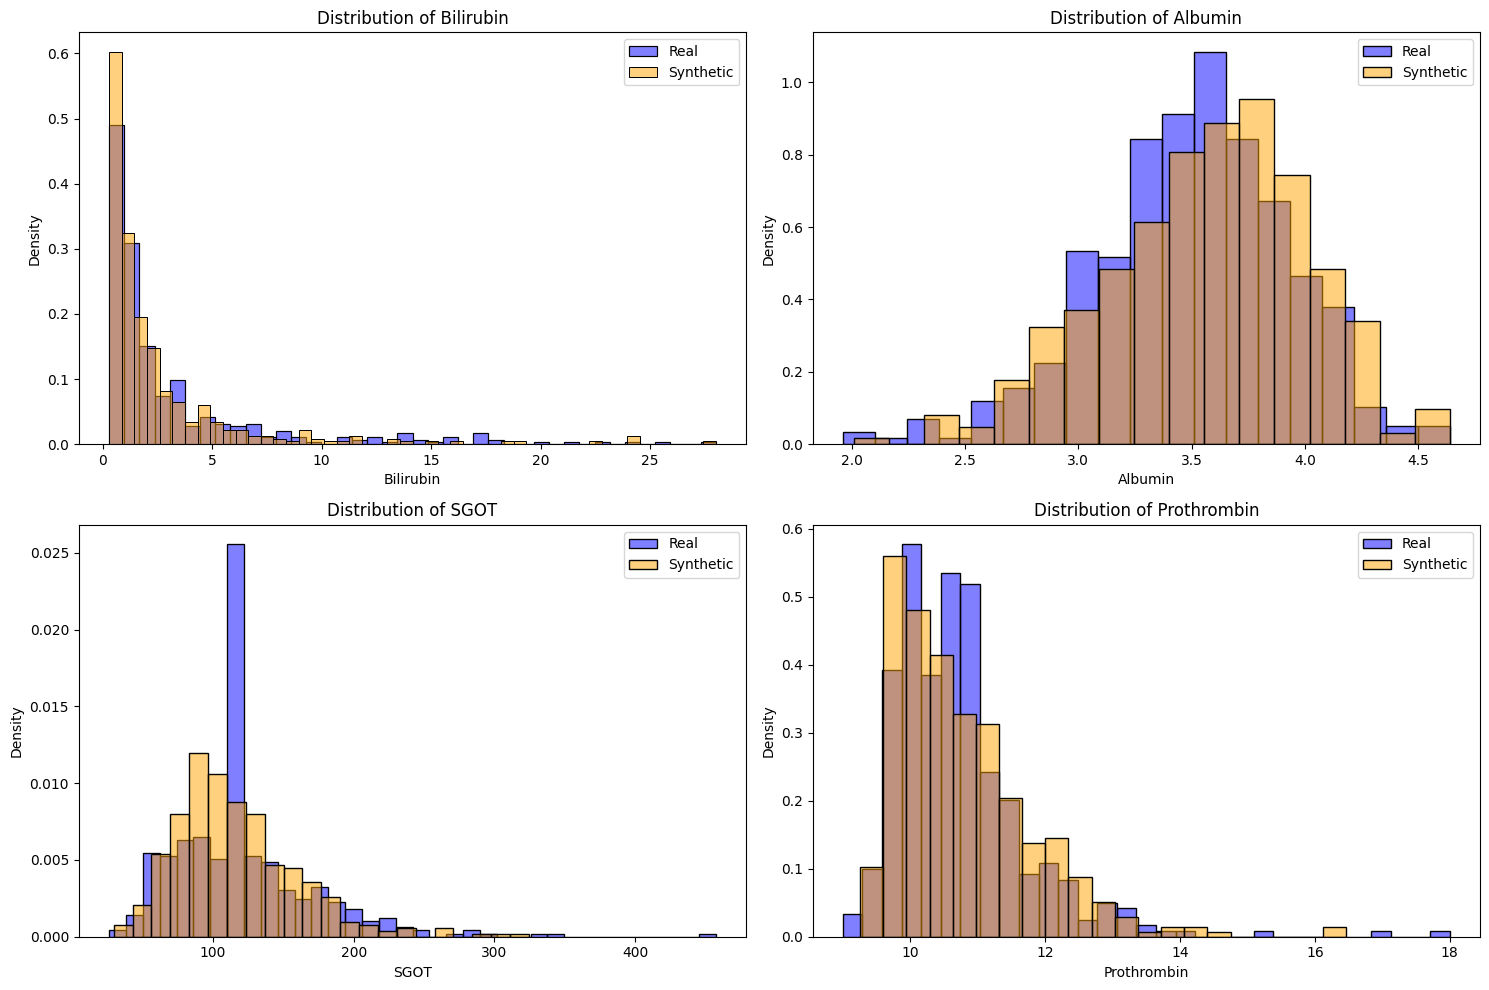

<Figure size 800x500 with 0 Axes>

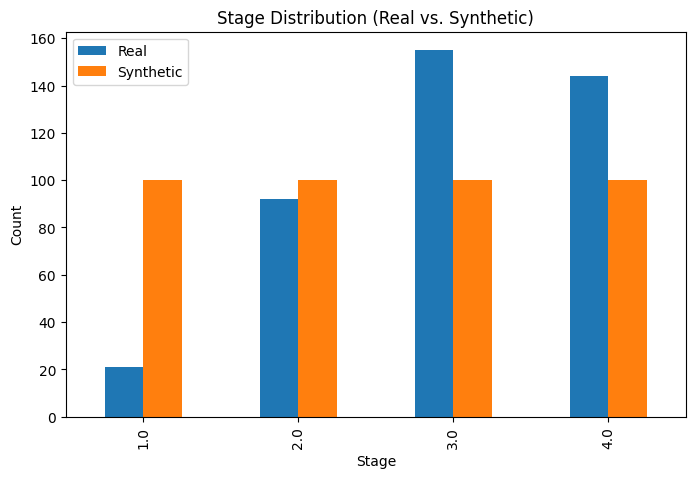


T-Test and Cohen's d Results (Real vs. Synthetic):
Bilirubin: T-Test p-value = 0.0365
Reject H0: The means of Bilirubin are significantly different.
Cohen's d for Bilirubin: 0.1468
Albumin: T-Test p-value = 0.0416
Reject H0: The means of Albumin are significantly different.
Cohen's d for Albumin: -0.1433
SGOT: T-Test p-value = 0.1757
Fail to reject H0: The means of SGOT are not significantly different.
Cohen's d for SGOT: 0.0951
Prothrombin: T-Test p-value = 0.5698
Fail to reject H0: The means of Prothrombin are not significantly different.
Cohen's d for Prothrombin: -0.0399

KS-Test Results (Real vs. Synthetic):
Bilirubin: KS-Test p-value = 0.0008
Reject H0: The distributions of Bilirubin are significantly different.
Albumin: KS-Test p-value = 0.0089
Reject H0: The distributions of Albumin are significantly different.
SGOT: KS-Test p-value = 0.0000
Reject H0: The distributions of SGOT are significantly different.
Prothrombin: KS-Test p-value = 0.1962
Fail to reject H0: The distributi

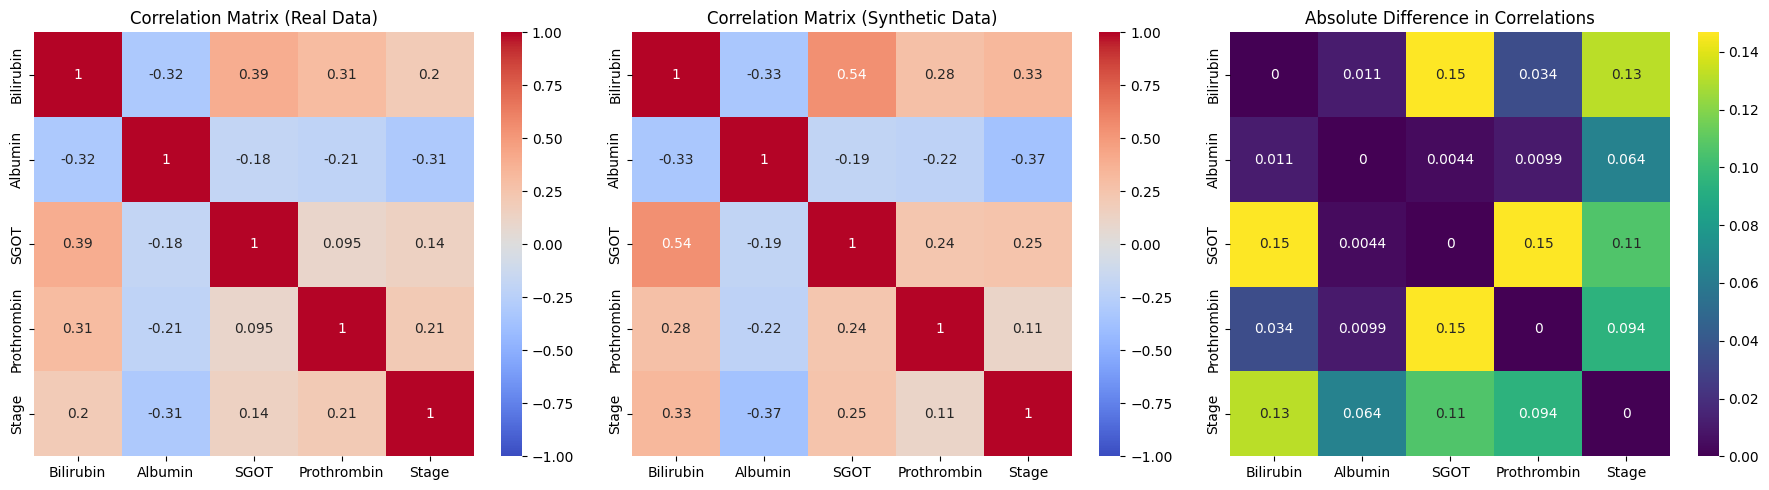


Machine Learning Utility Test:
Accuracy (Train on Real, Test on Real): 0.7108
Accuracy (Train on Synthetic, Test on Real): 0.5542


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, ks_2samp
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load real and synthetic data
real_df = pd.read_csv('preprocessed_cirrhosis2.csv')
synthetic_df = pd.read_csv('synthetic_cirrhosis_data2.csv')
features_for_gan = ['Bilirubin', 'Albumin', 'SGOT', 'Prothrombin', 'Stage']

# Handle missing values (if any) to avoid skewing statistical tests
real_df = real_df[features_for_gan].dropna()
synthetic_df = synthetic_df[features_for_gan].dropna()

# Descriptive Statistical Analysis for Synthetic Data
print("\nDescriptive Statistical Analysis for Synthetic Data:")
# Summary statistics
real_summary = real_df[features_for_gan].describe()
synthetic_summary = synthetic_df[features_for_gan].describe()
print("\nSummary Statistics for Real Data:\n", real_summary)
print("\nSummary Statistics for Synthetic Data:\n", synthetic_summary)

# Compare means and standard deviations
comparison = pd.DataFrame({
    'Real Mean': real_summary.loc['mean'],
    'Synthetic Mean': synthetic_summary.loc['mean'],
    'Real Std': real_summary.loc['std'],
    'Synthetic Std': synthetic_summary.loc['std']
})
print("\nComparison of Means and Standard Deviations:\n", comparison)

# Visualize feature distributions using histograms
continuous_features = ['Bilirubin', 'Albumin', 'SGOT', 'Prothrombin']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(real_df[feature], color='blue', label='Real', alpha=0.5, stat='density')
    sns.histplot(synthetic_df[feature], color='orange', label='Synthetic', alpha=0.5, stat='density')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

# Visualize Stage distribution using a bar plot
plt.figure(figsize=(8, 5))
real_counts = real_df['Stage'].value_counts().sort_index()
synthetic_counts = synthetic_df['Stage'].value_counts().sort_index()
stage_df = pd.DataFrame({'Real': real_counts, 'Synthetic': synthetic_counts}).fillna(0)
stage_df.plot(kind='bar', figsize=(8, 5))
plt.title('Stage Distribution (Real vs. Synthetic)')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

# Inferential Statistics and Null Hypothesis Testing
# T-tests and Cohen's d for continuous features
print("\nT-Test and Cohen's d Results (Real vs. Synthetic):")
for feature in continuous_features:
    real_vals = real_df[feature].values
    synthetic_vals = synthetic_df[feature].values
    
    # T-test
    stat, p_value = ttest_ind(real_vals, synthetic_vals, equal_var=False)
    print(f"{feature}: T-Test p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"Reject H0: The means of {feature} are significantly different.")
    else:
        print(f"Fail to reject H0: The means of {feature} are not significantly different.")
    
    # Cohen's d
    mean_diff = np.mean(real_vals) - np.mean(synthetic_vals)
    pooled_std = np.sqrt((np.std(real_vals, ddof=1) ** 2 + np.std(synthetic_vals, ddof=1) ** 2) / 2)
    cohen_d = mean_diff / pooled_std if pooled_std != 0 else 0
    print(f"Cohen's d for {feature}: {cohen_d:.4f}")

# Kolmogorov-Smirnov (KS) test for continuous features
print("\nKS-Test Results (Real vs. Synthetic):")
for feature in continuous_features:
    stat, p_value = ks_2samp(real_df[feature], synthetic_df[feature])
    print(f"{feature}: KS-Test p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"Reject H0: The distributions of {feature} are significantly different.")
    else:
        print(f"Fail to reject H0: The distributions of {feature} are not significantly different.")

# Chi-square test for Stage
print("\nChi-Square Test for Stage Distribution:")
real_counts = real_df['Stage'].value_counts().sort_index()
synthetic_counts = synthetic_df['Stage'].value_counts().sort_index()
contingency_table = pd.DataFrame({
    'Real': real_counts,
    'Synthetic': synthetic_counts
}).fillna(0)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: The Stage distributions are significantly different.")
else:
    print("Fail to reject H0: The Stage distributions are not significantly different.")

# Matching Correlation Coefficient
real_corr = real_df[features_for_gan].corr()
synthetic_corr = synthetic_df[features_for_gan].corr()
corr_diff = np.abs(real_corr - synthetic_corr)
matching_corr = corr_diff.mean().mean()
print(f"\nMatching Correlation Coefficient (Average Absolute Difference): {matching_corr:.4f}")

# Visualize correlation matrices and their differences
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.heatmap(real_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Real Data)')
plt.subplot(1, 3, 2)
sns.heatmap(synthetic_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Synthetic Data)')
plt.subplot(1, 3, 3)
sns.heatmap(corr_diff, annot=True, cmap='viridis', vmin=0, vmax=corr_diff.max().max())
plt.title('Absolute Difference in Correlations')
plt.tight_layout()
plt.show()

# Machine Learning Utility Test
print("\nMachine Learning Utility Test:")
# Prepare data
X_real = real_df[continuous_features]
y_real = real_df['Stage'].apply(lambda x: 0 if x in [1, 2] else 1)
X_synthetic = synthetic_df[continuous_features]
y_synthetic = synthetic_df['Stage'].apply(lambda x: 0 if x in [1, 2] else 1)

# Split real data into train and test
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Train on real data, test on real data
model = LogisticRegression(random_state=42)
model.fit(X_train_real, y_train_real)
y_pred_real = model.predict(X_test_real)
acc_real = accuracy_score(y_test_real, y_pred_real)
print(f"Accuracy (Train on Real, Test on Real): {acc_real:.4f}")

# Train on synthetic data, test on real data
model.fit(X_synthetic, y_synthetic)
y_pred_synthetic = model.predict(X_test_real)
acc_synthetic = accuracy_score(y_test_real, y_pred_synthetic)
print(f"Accuracy (Train on Synthetic, Test on Real): {acc_synthetic:.4f}")

In [6]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Load the real data
real_df = pd.read_csv('preprocessed_cirrhosis2.csv')

# Apply log transformation to heavy-tailed features
real_df['Bilirubin'] = np.log1p(real_df['Bilirubin'])
real_df['SGOT'] = np.log1p(real_df['SGOT'])

# Add interaction terms
real_df['Bilirubin_SGOT'] = real_df['Bilirubin'] * real_df['SGOT']
real_df['Albumin_Prothrombin'] = real_df['Albumin'] * real_df['Prothrombin']

# Update feature set
X = real_df[['Bilirubin', 'Albumin', 'SGOT', 'Prothrombin', 'Bilirubin_SGOT', 'Albumin_Prothrombin']]
y = real_df['Stage'].apply(lambda x: 0 if x in [1, 2] else 1)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=4)  # Select top 4 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected features: {selected_features}")

# Update X with selected features
X = pd.DataFrame(X_selected, columns=selected_features)

# Scale the updated feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Initialize StratifiedKFold for 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grids for hyperparameter tuning
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

lgb_param_grid = {
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# List of models with their base configurations
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
    'LightGBM': lgb.LGBMClassifier(
        random_state=42,
        min_data_in_leaf=5,
        max_depth=2,
        num_leaves=4,
        scale_pos_weight=239/90,
        force_col_wise=True,
        extra_trees=True,
        verbose=-1
    ),
    'MLP': None  # Replaced Single Layer CNN with MLP
}

# Dictionary to store cross-validation scores
model_scores = {model_name: {
    'accuracy': [], 'precision': [], 'recall': [], 'specificity': [],
    'f1': [], 'auc_roc': []
} for model_name in models.keys()}

# Dictionary to store best models after tuning
best_models = {}

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    fold = 1
    fold_accuracies = []
    
    for train_index, test_index in skf.split(X_scaled, y):
        print(f"Fold {fold}")
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if model_name == 'MLP':
            # Define and train MLP
            mlp = Sequential([
                Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                Dense(32, activation='relu'),
                Dense(1, activation='sigmoid')
            ])
            mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            mlp.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
            
            # Predict
            y_pred_proba = mlp.predict(X_test, verbose=0).flatten()
            y_pred = (y_pred_proba > 0.5).astype(int)

        else:
            # Apply hyperparameter tuning using GridSearchCV
            if model_name == 'Logistic Regression':
                grid_search = GridSearchCV(model, lr_param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
            elif model_name == 'Gradient Boosting':
                grid_search = GridSearchCV(model, gb_param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
            elif model_name == 'Random Forest':
                grid_search = GridSearchCV(model, rf_param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
            elif model_name == 'LightGBM':
                grid_search = GridSearchCV(model, lgb_param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

            # Fit the grid search
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            
            # Store the best model for ensemble later
            if fold == 1:
                best_models[model_name] = best_model
            
            # Predict with the best model for this fold
            y_pred = best_model.predict(X_test)
            y_pred_proba = best_model.predict_proba(X_test)[:, 1]

        # Compute metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        accuracy = report['accuracy']
        precision = report['1']['precision']
        recall = report['1']['recall']
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = report['1']['f1-score']
        auc = roc_auc_score(y_test, y_pred_proba)

        # Store metrics
        model_scores[model_name]['accuracy'].append(accuracy)
        model_scores[model_name]['precision'].append(precision)
        model_scores[model_name]['recall'].append(recall)
        model_scores[model_name]['specificity'].append(specificity)
        model_scores[model_name]['f1'].append(f1)
        model_scores[model_name]['auc_roc'].append(auc)

        fold_accuracies.append(accuracy)
        fold += 1

    # Print best parameters for this model (if applicable)
    if model_name != 'MLP':
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best CV accuracy for {model_name}: {grid_search.best_score_:.4f}")

# Add VotingClassifier as a new model
print("\nEvaluating Voting Classifier (Logistic Regression + LightGBM)...")
voting_scores = {
    'accuracy': [], 'precision': [], 'recall': [], 'specificity': [],
    'f1': [], 'auc_roc': []
}
fold = 1
for train_index, test_index in skf.split(X_scaled, y):
    print(f"Fold {fold}")
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define and train VotingClassifier
    voting_clf = VotingClassifier(estimators=[
        ('lr', best_models['Logistic Regression']),
        ('lgbm', best_models['LightGBM'])
    ], voting='soft')
    voting_clf.fit(X_train, y_train)

    # Predict
    y_pred = voting_clf.predict(X_test)
    y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]

    # Compute metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = report['accuracy']
    precision = report['1']['precision']
    recall = report['1']['recall']
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = report['1']['f1-score']
    auc = roc_auc_score(y_test, y_pred_proba)

    # Store metrics
    voting_scores['accuracy'].append(accuracy)
    voting_scores['precision'].append(precision)
    voting_scores['recall'].append(recall)
    voting_scores['specificity'].append(specificity)
    voting_scores['f1'].append(f1)
    voting_scores['auc_roc'].append(auc)

    fold += 1

# Add VotingClassifier scores to model_scores
model_scores['Voting Classifier'] = voting_scores

# Print average metrics for each model
for model_name in model_scores:
    print(f"\n{model_name} Cross-Validation Results (Averaged Across 5 Folds):")
    for metric in model_scores[model_name]:
        scores = model_scores[model_name][metric]
        print(f"Average {metric.capitalize()}: {np.mean(scores):.4f} (±{np.std(scores):.4f})")

# ANOVA for model comparison (Accuracy)
accuracy_scores = [model_scores[model_name]['accuracy'] for model_name in model_scores]
f_stat, p_value = f_oneway(*accuracy_scores)
print("\nANOVA Results for Model Comparison (Accuracy):")
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in Accuracy between at least two models.")
    all_scores = []
    model_labels = []
    for model_name, scores in model_scores.items():
        all_scores.extend(scores['accuracy'])
        model_labels.extend([model_name] * len(scores['accuracy']))
    tukey = pairwise_tukeyhsd(endog=all_scores, groups=model_labels, alpha=0.05)
    print("\nTukey's HSD Post-Hoc Test Results:")
    print(tukey)
else:
    print("Fail to reject H0: No significant difference in Accuracy between models.")

2025-04-21 02:41:07.969195: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 02:41:07.982323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745199667.996668   23279 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745199668.000212   23279 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745199668.014534   23279 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Selected features: ['Bilirubin', 'Albumin', 'SGOT', 'Bilirubin_SGOT']

Evaluating Gradient Boosting...
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV accuracy for Gradient Boosting: 0.7212

Evaluating Random Forest...
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Best parameters for Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV accuracy for Random Forest: 0.7242

Evaluating Logistic Regression...
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Best parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV accuracy for Logistic Regression: 0.7364

Evaluating LightGBM...
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Best parameters for LightGBM: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}
Best CV accuracy for LightGBM: 0.72

2025-04-21 03:49:19.058101: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Fold 2
Fold 3
Fold 4
Fold 5

Evaluating Voting Classifier (Logistic Regression + LightGBM)...
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5

Gradient Boosting Cross-Validation Results (Averaged Across 5 Folds):
Average Accuracy: 0.7112 (±0.0173)
Average Precision: 0.7375 (±0.0166)
Average Recall: 0.9365 (±0.0355)
Average Specificity: 0.1166 (±0.0798)
Average F1: 0.8246 (±0.0122)
Average Auc_roc: 0.6034 (±0.0494)

Random Forest Cross-Validation Results (Averaged Across 5 Folds):
Average Accuracy: 0.7257 (±0.0127)
Average Precision: 0.7546 (±0.0134)
Average Recall: 0.9232 (±0.0308)
Average Specificity: 0.2047 (±0.0577)
Average F1: 0.8299 (±0.0097)
Average Auc_roc: 0.6202 (±0.0448)

Logistic Regression Cross-Validation Results (Averaged Across 5 Folds):
Average Accuracy: 0.7354 (±0.0236)
Average Precision: 0.7669 (±0.0114)
Average Recall: 0.9132 (±0.0285)
Average Specificity: 0.2656 (±0.0402)
Average F1: 0.8335 (±0.0157)
Average Auc_roc: 0.6567 (±0.0433)

LightGBM Cross-Validation Results (Averaged 